<a href="https://colab.research.google.com/github/MuzMoh/Customer_Segmentation/blob/main/Ulabox_Order_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we try to segment customers into different categories based on their purchasing behaviour. Conclusions from customer segmentation can give us bussiness insights and strategies.

Topics explored in the notebook

1. Importing required libraries and data
2. Simple visualisation of the data and few samples
3. Visualisation via pca and pairplot
4. Checking for dependent variables
5. Outlier detection and handling
6. Cluster analysis: Are there clusters, how many?
7. Clustering and interpretation
8. Deriving conclusions

# 1. Importing required libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
import itertools

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Ulabox Customer Segmentation/ulabox_orders_with_categories_partials_2017.csv')

In [3]:
data.head()

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0         0      0           45      23.03        4    13   9.46   87.06   
1         0      1           38       1.22        5    13  15.87   75.80   
2         0      2           51      18.08        4    13  16.88   56.75   
3         1      3           57      16.51        1    12  28.81   35.99   
4         1      4           53      18.31        2    11  24.13   60.38   

   Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
0     3.48   0.00     0.00     0.00    0.0    0.0  
1     6.22   2.12     0.00     0.00    0.0    0.0  
2     3.37  16.48     6.53     0.00    0.0    0.0  
3    11.78   4.62     2.87    15.92    0.0    0.0  
4     7.78   7.72     0.00     0.00    0.0    0.0

# 2. Simple Visualisation

In [4]:
data.describe()

customer         order   total_items     discount%       weekday  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    5012.483367  14999.500000     31.739933      8.455495      3.642367   
std     2888.646245   8660.398374     20.576579     14.199350      2.122031   
min        0.000000      0.000000      1.000000    -65.150000      1.000000   
25%     2541.750000   7499.750000     18.000000      1.177500      2.000000   
50%     5043.000000  14999.500000     29.000000      4.160000      3.000000   
75%     7483.000000  22499.250000     41.000000      9.990000      5.000000   
max    10238.000000  29999.000000    298.000000    100.000000      7.000000   

               hour         Food%        Fresh%       Drinks%         Home%  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      15.034667     23.560406     20.227279     23.349235     13.539575   
std        5.717052     21.719824     23.661767     22.523335     17.850282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      7.220000      0.000000      6.710000      0.000000   
50%       15.000000     19.650000     10.930000     17.890000      7.210000   
75%       20.000000     33.260000     35.790000     33.162500     20.002500   
max       23.000000    100.000000    100.000000    100.000000    100.000000   

            Beauty%       Health%         Baby%         Pets%  
count  30000.000000  30000.000000  30000.000000  30000.000000  
mean       5.892949      1.132959     11.096145      1.043087  
std       13.996518      5.307620     24.740364      6.195390  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        6.512500      0.000000      4.172500      0.000000  
max      100.000000    100.000000    100.000000    100.000000

1. customer is the unique customer id.
2. order is the unique order id.
3. total_items is the number of products bought in the order.
4. discount% is the amount of discount provided during the purchase, the negative values in discount stands for extra amount the customer paid to ulabox as delivery charge or any other mode of fee.
5. weekday is the day of the week in which the order was placed.
6. hour is the time in which the order is placed.
7. Food% is the amount of money spent on non fresh food in the purchase, it may include grocery products like sugar, coffee powder, oats etc.
8. Fresh% is the amount of money spent on fresh food like milk, fruits, vegetables etc.
9. Drinks% is most probably the percentage of amount spent on alchohol like wine, vodka, scotch etc. There is a teeny tiny chance that these also include soft drinks.
10. Home% is the percentage of money spent in home accessories.
11. Beauty% is the percentage of amount spent in beauty products
12. Health% is the percentage of amount spent in medicine or health products like protein supplement, carb supplement etc.
13. Baby% is the percentage spent in baby products.
14. Pets% is the percentage spent in pet products like pedigree.

In [5]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True)

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
4554       1487   4554            9     -63.64        7    13   0.00    0.00   
7185       2418   7185            9     -47.26        5     8   0.00    0.00   
768         199    768           14     -39.84        6     8  28.97    0.00   
16098      5379  16098            8     -26.15        3    13   0.00    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
5060       1696   5060           26      -0.34        4    11  24.60    0.00   
17998      6038  17998           22      -0.33        2    23   4.74    0.00   
13526      4557  13526           77      -0.19        4    12  78.57    0.00   
20654      6889  20654           44      -0.04        4     0  33.87    0.00   
8247       2875   8247           35      -0.03        6     9  34.31   32.01   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
23632    86.97  13.03     0.00     0.00   0.00    0.0  
4554    100.00   0.00     0.00     0.00   0.00    0.0  
7185    100.00   0.00     0.00     0.00   0.00    0.0  
768      71.03   0.00     0.00     0.00   0.00    0.0  
16098   100.00   0.00     0.00     0.00   0.00    0.0  
...        ...    ...      ...      ...    ...    ...  
5060     34.11  32.87     8.42     0.00   0.00    0.0  
17998    15.49   0.00     0.00     0.00  79.77    0.0  
13526    14.69   6.74     0.00     0.00   0.00    0.0  
20654    14.96  17.42    15.40    18.36   0.00    0.0  
8247      5.33   8.90     8.66     6.45   4.34    0.0  

[126 rows x 14 columns]

* drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks.

## Selecting Samples

In [6]:
indices = [56,2459,908,23632,1803,218,592,349]
data.iloc[indices, :]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
56            4     56           32       3.10        3    19  36.49   53.59   
2459        744   2459           57      14.01        2    22  24.86    7.26   
908         238    908           23       2.98        3    21   8.20   19.14   
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
1803        529   1803            9       5.77        4     7   0.00    0.00   
218          43    218           21       9.87        3    16   0.00    0.00   
592         145    592           15       4.51        5    19   7.48    0.00   
349          70    349           17      27.05        1    15  19.01    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
56        9.92   0.00     0.00     0.00   0.00   0.00  
2459     21.37  19.64     1.64     0.72  24.51   0.00  
908      32.27   4.97     4.02     1.89  29.51   0.00  
23632    86.97  13.03     0.00     0.00   0.00   0.00  
1803      0.00  25.56     0.00     0.00   0.00  74.44  
218      23.69  76.31     0.00     0.00   0.00   0.00  
592       0.00  16.22    60.29     0.00   0.00  16.00  
349       0.00   0.00     0.00     0.00  80.99   0.00

* 56 order seems to depend on ulabox for grocery, fresh food and drinks.
* 2459 and 908 order seems to depend on ulabox for everything, probably most valuable customers.
* 23632 order seems to buy a lot of drinks from ulabox in spite of the negative discount, which implies extra charges.
* 1803 buys a lot of pet products, the order must be by a pet lover.
* 218 buys a lot of home decoratory accessories.
* 592 must be a woman, who would like her beauty products, to be delivered by ulabox at her door.
* 349 seems to be parents, who newly had a baby.


There may not be any relevant information in the hour in which the order was placed, but the weekday in which the order was placed may reveal some information about weekend buyers. Hece let's keep it.

Let's remove customer, order and hour features from the data

In [7]:
df = data.drop(['customer', 'order', 'hour'], axis=1)
frame = data

# 3. Visualization via pca and pairplot

Let's try and do pca of the features and see the explained variance and plots

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(n_components=11)

This function takes the pca object and data frame as argurments and plots the explained variance of every feature in each principal component.

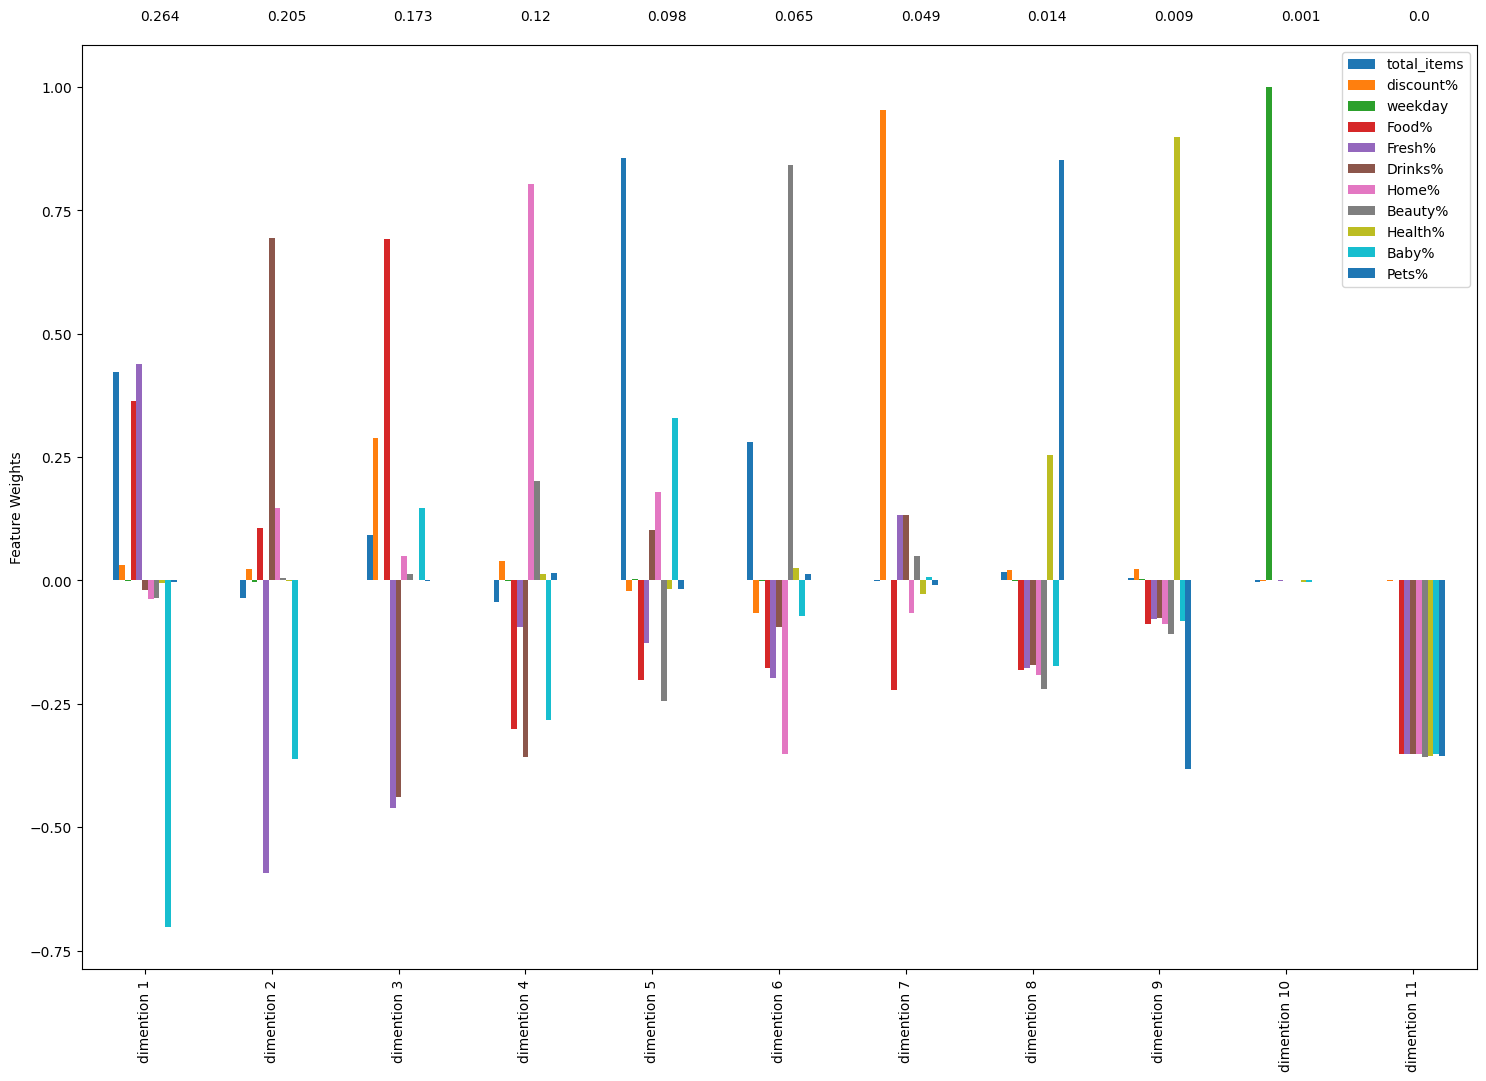

In [10]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

pca_results(pca, df)

This function accepts pca object and data frame as arguements and plots the scatter plot of first four principal components.

<Figure size 1000x1000 with 0 Axes>

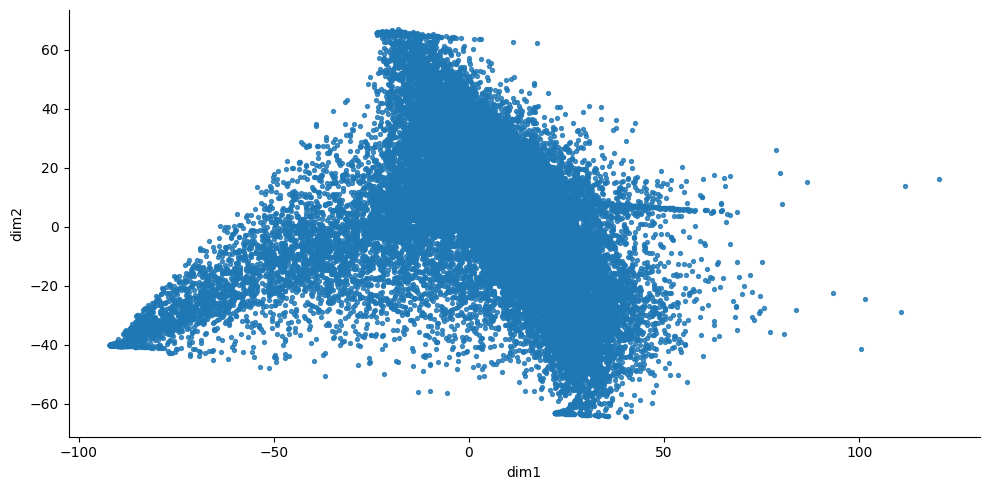

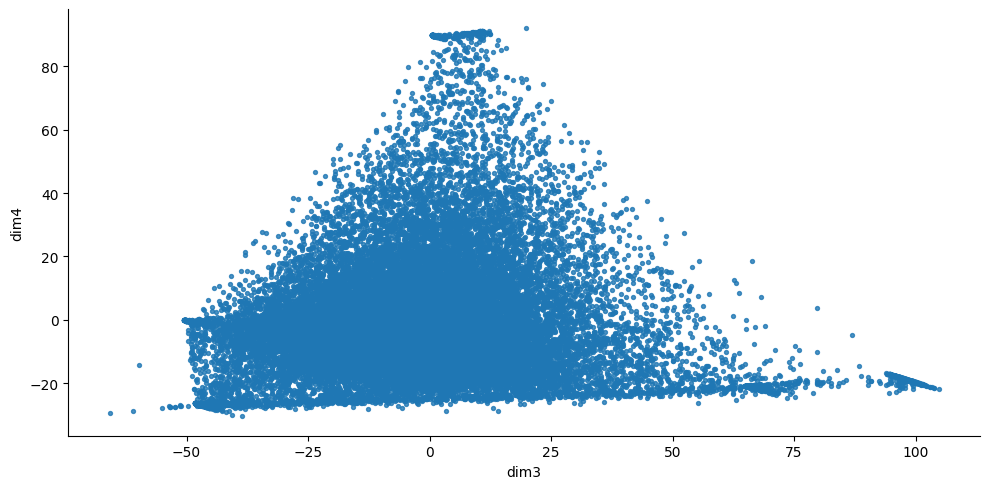

In [11]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, aspect=2, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, aspect=2, fit_reg=False, scatter_kws={'s':8});
    plt.show()

pca_2d_plot(pca, df)

Now let's plot the pairplots and see the variations and distributions of features with respect to each other.

<Figure size 2000x2000 with 0 Axes>

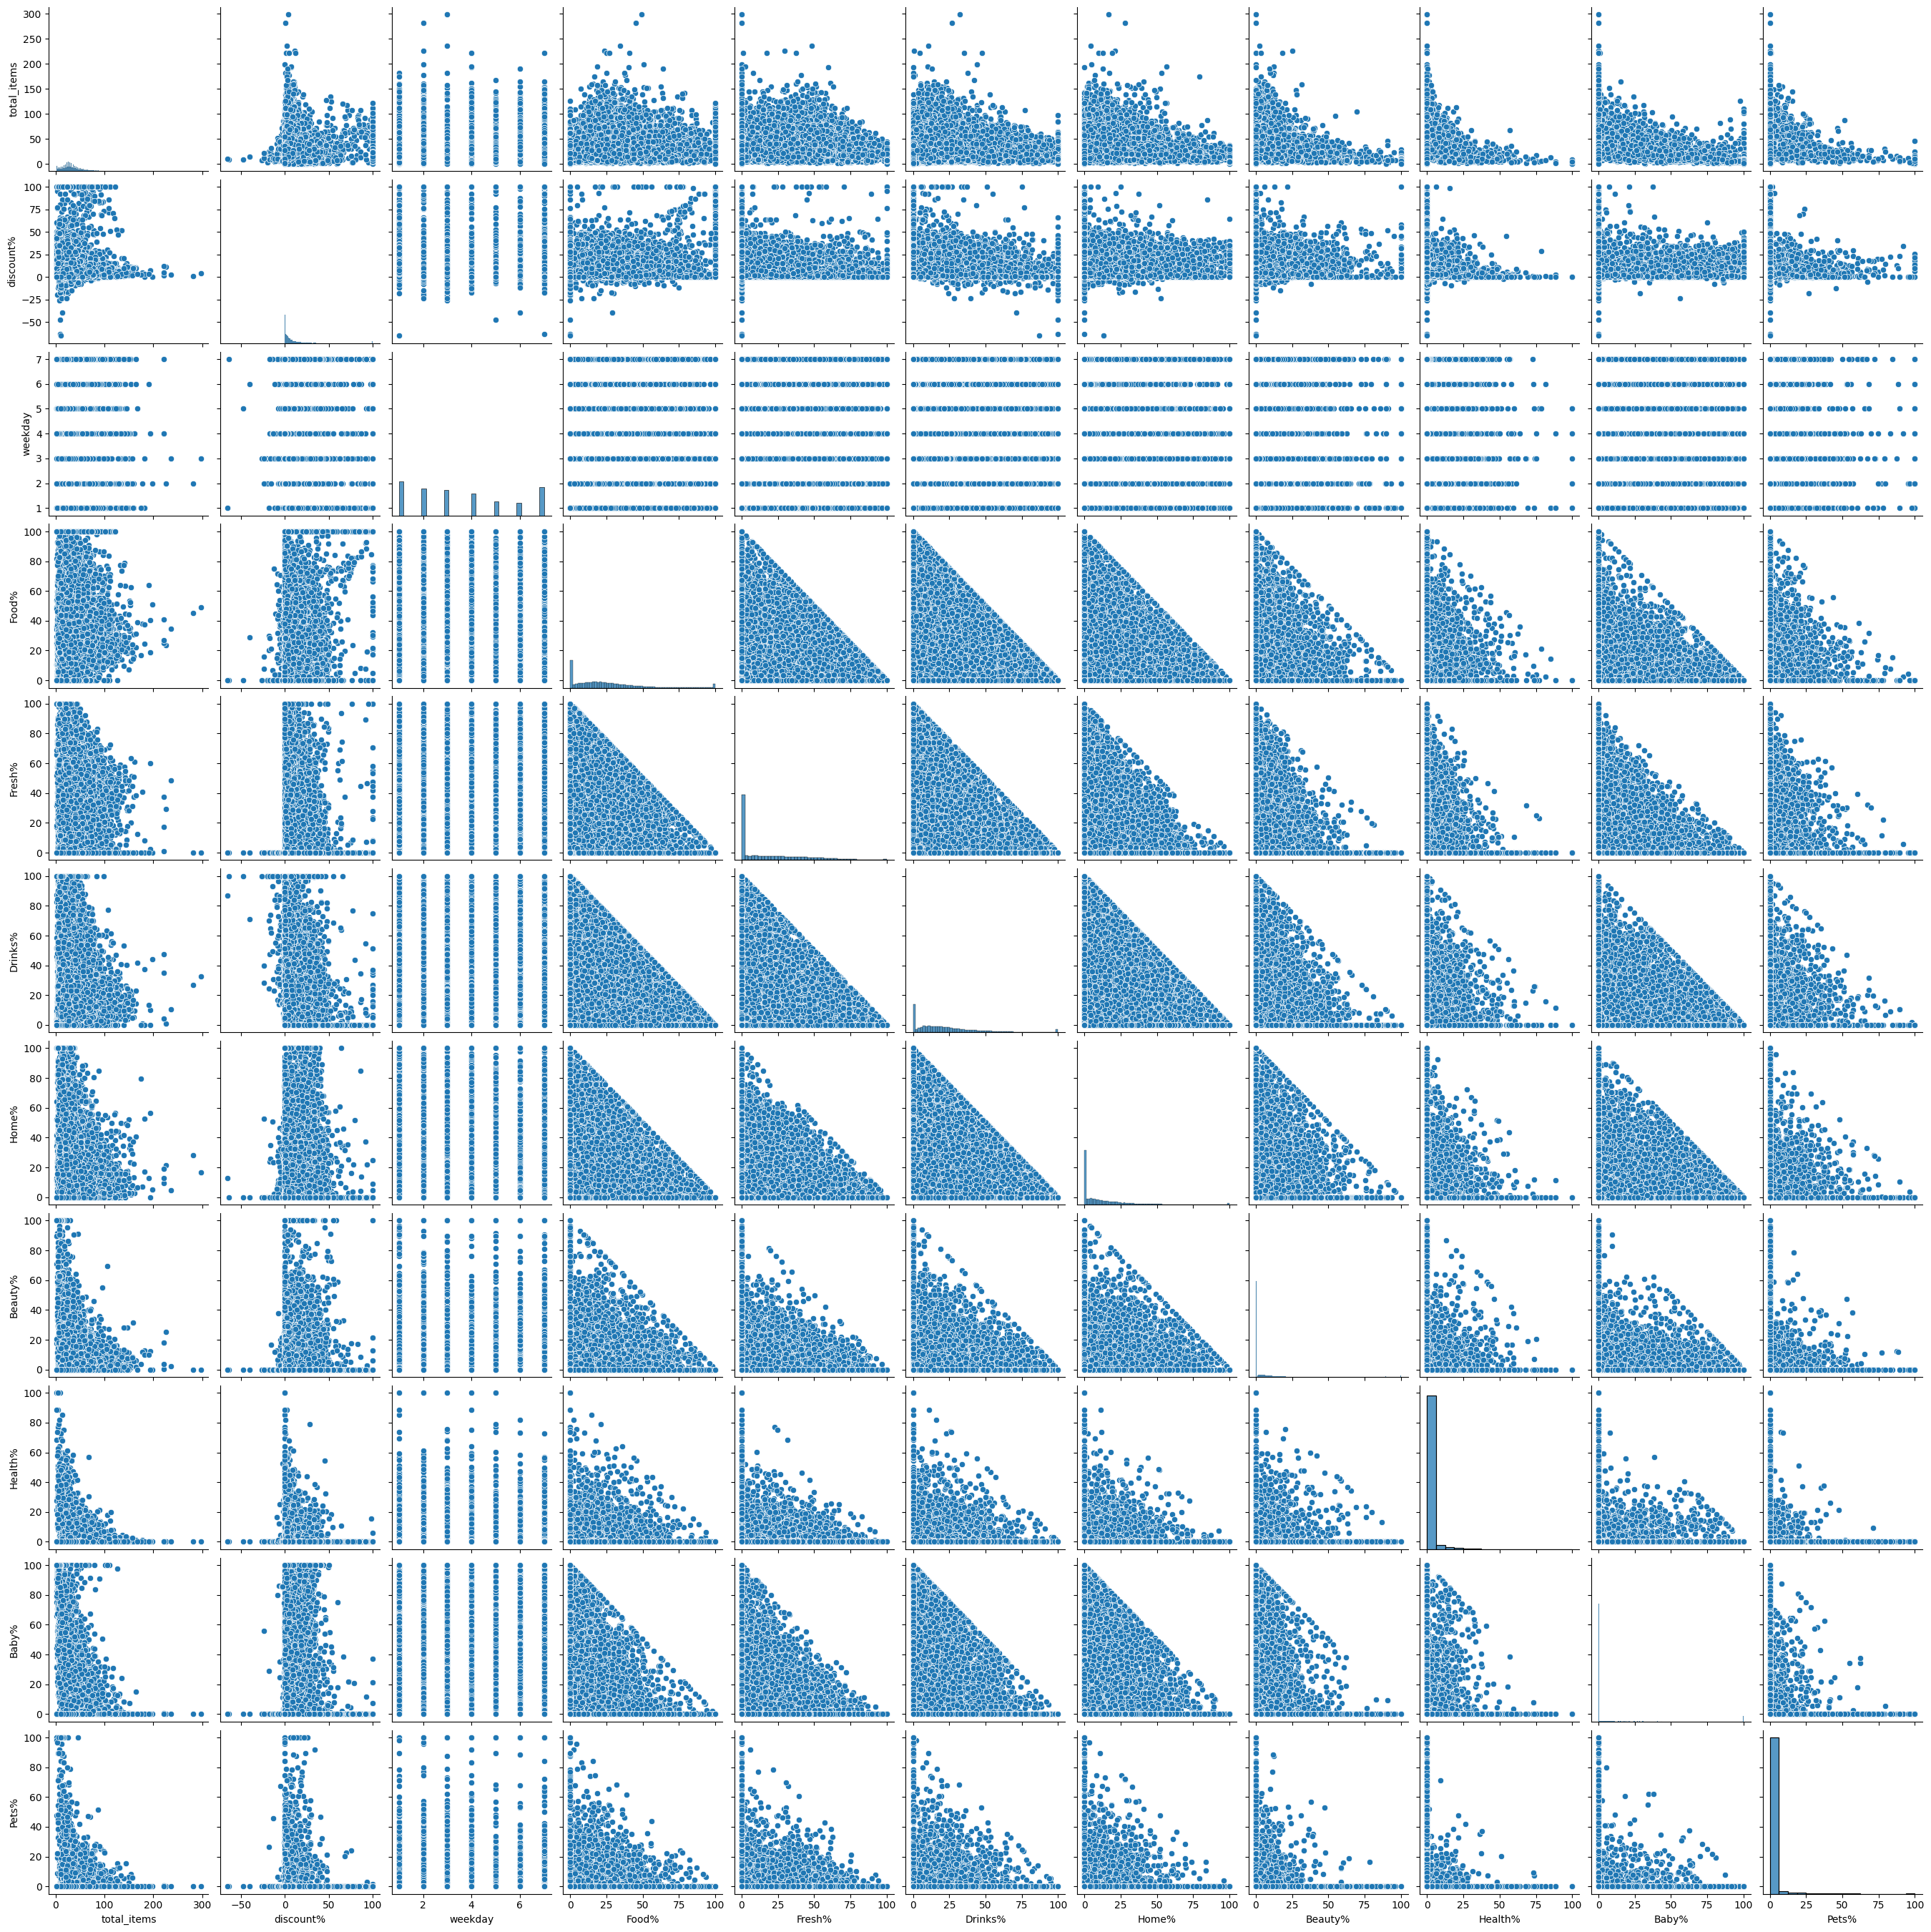

In [12]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

* total_items is skewed, applying a log transformation will help the clustering.
* when discount% increases total_items icreases which makes sense, people will buy more on discount.
* below the 0 discount line only Drinks% has non zero percentage entries. Food%, Fresh% etc. have only zero percentage entries in negative discount area.
* it makes sense that the plots in the right bottom are bound by the line x+y = 100, as the data is actually in percentage x+y <= 100.
* the distribution plots are more and more skewed as we move towards the right bottom, as pet products, baby products and health products are brought by very less people.

# 4. Checking Dependant Variables

This function takes the data frame as arguement and prints R2 score of model trained with each feature as target. This is a good method to identify the dependant variables from our dataset. This can be used in other contexts as well.

In [13]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

dependant_variable_detector(df)

Using total_items as dependent variable R2 score is :0.15848816407725963
Using discount% as dependent variable R2 score is :0.12779784963128127
Using weekday as dependent variable R2 score is :0.0019194529930831594
Using Food% as dependent variable R2 score is :0.9925724183188357
Using Fresh% as dependent variable R2 score is :0.9937312704627193
Using Drinks% as dependent variable R2 score is :0.9930865737794141
Using Home% as dependent variable R2 score is :0.9889948946530749
Using Beauty% as dependent variable R2 score is :0.9827301055344402
Using Health% as dependent variable R2 score is :0.888319659143346
Using Baby% as dependent variable R2 score is :0.994269557581205
Using Pets% as dependent variable R2 score is :0.9155244182728488


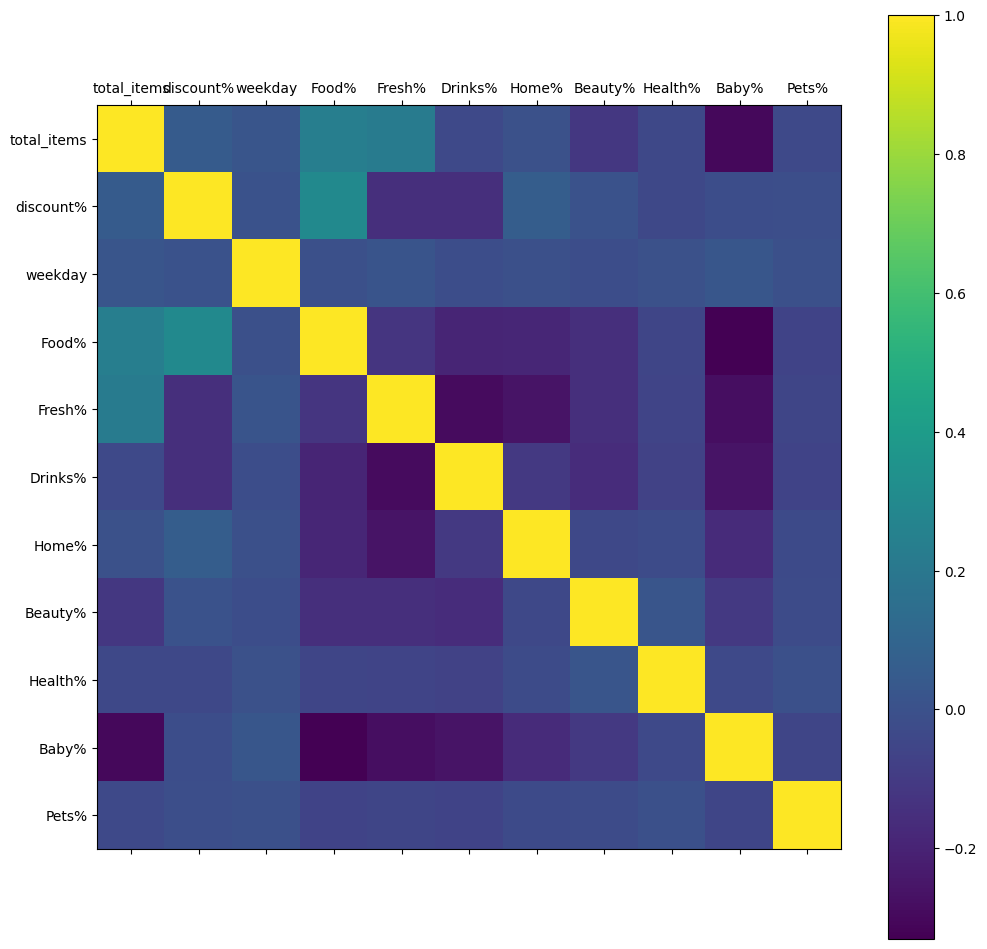

In [14]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

plot_corr_matrix(df)

* The high R2 score in the case of Food%, Fresh% etc. does not mean they don't contain any information individually.
* The high R2 score is owing to this relationship Food% + Fresh% + .......+ Pets% = 100, the regression model has learned it.



# 5. Outlier detection

<ipython-input-15-886382ad922d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


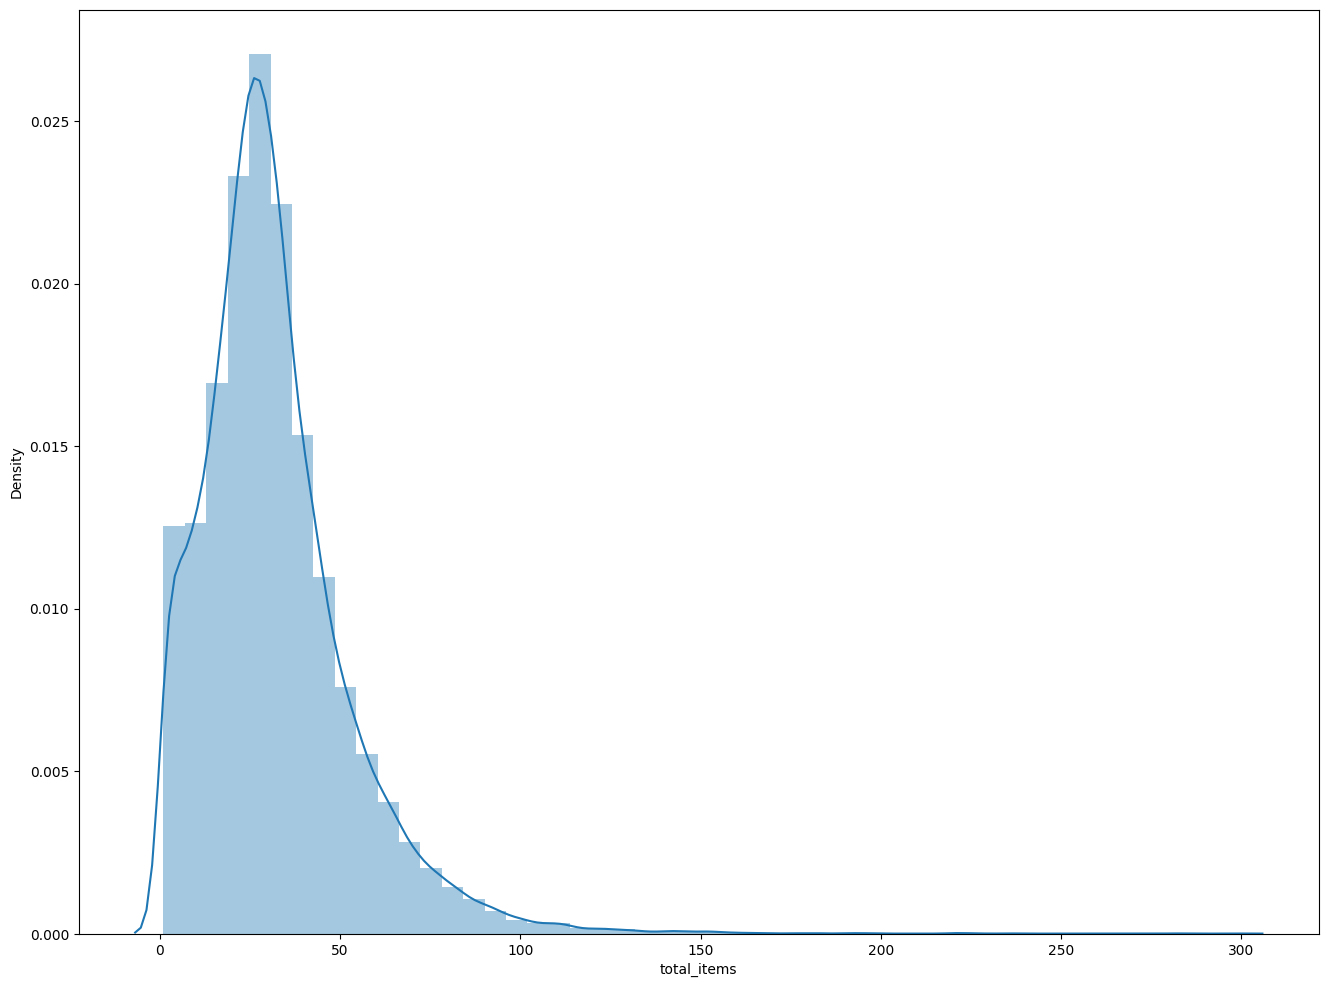

In [15]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

This distribution is skewed negatively, let's apply a log transformation.

<ipython-input-16-c11b2a342790>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


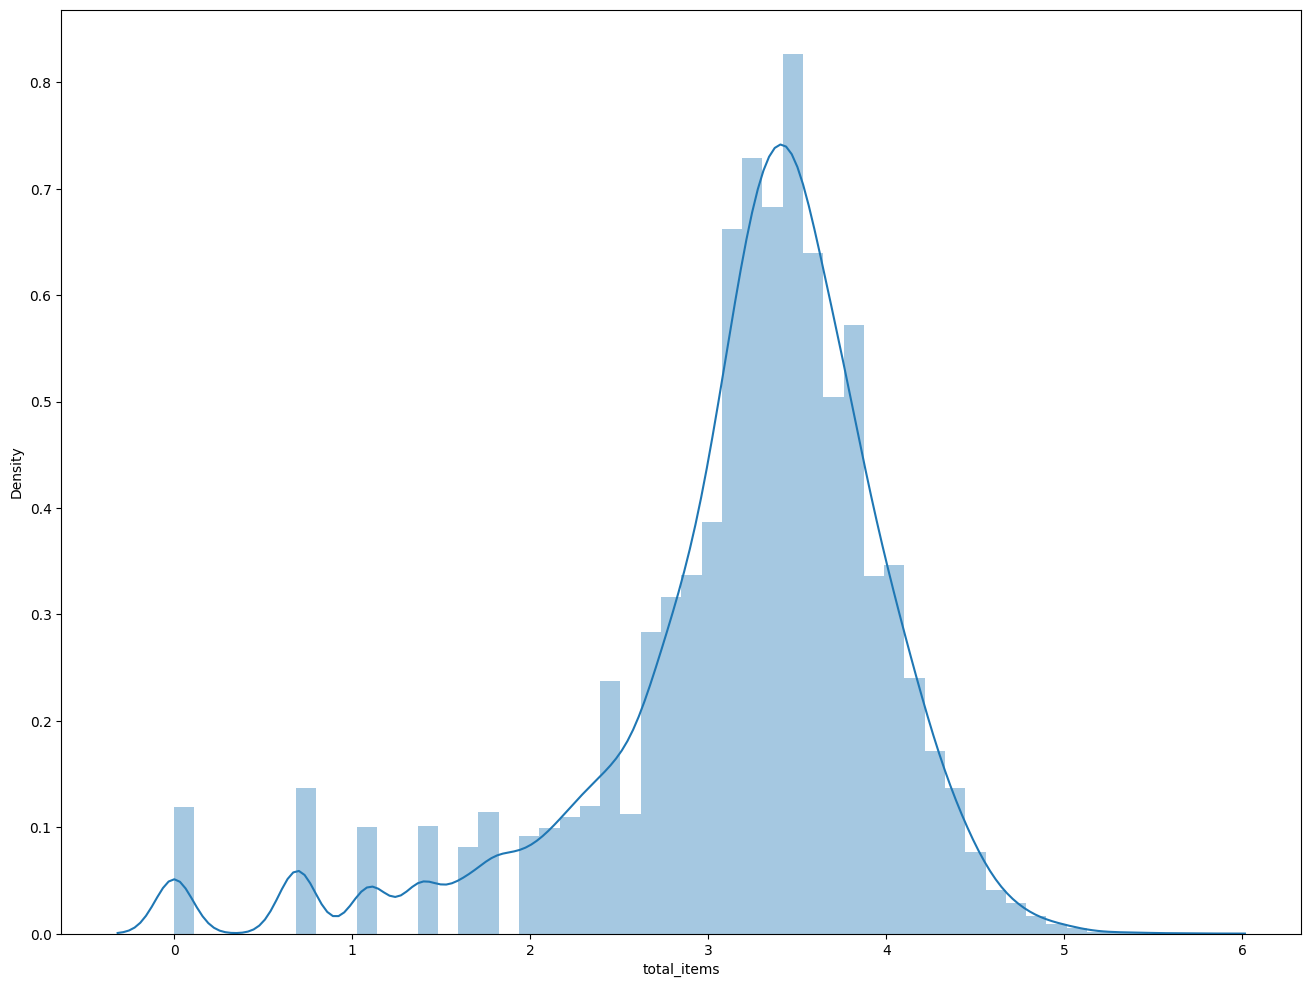

In [16]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

That's better

**Turkey Outlier Detection**

* According to Turkey method a point is an outlier if it lies 1.5 times inter
quartile distance to the right of third quartile or if it lies 1.5 times inter quartile distance to the left of first quartile.


This function takes df as an arguement and columns for which outlier detection has to be done, as an optional arguement. It returns a dictionary whose keys are column names and elements are indices of outlier points in the corresponding columns. It also prints the number of outliers in every column.

In [17]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]

    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index

    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))

    return outlier_indices

outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->1899
_________________________
discount%-------->2337
_________________________
weekday-------->0
_________________________
Food%-------->1221
_________________________
Fresh%-------->254
_________________________
Drinks%-------->1386
_________________________
Home%-------->1432
_________________________
Beauty%-------->2901
_________________________
Health%-------->30000
_________________________
Baby%-------->6403
_________________________
Pets%-------->30000


* The outliers in Health% and Pets% are due to the fact that, lot people don't buy these products and the entries are mostly 0.
* The outliers in Food%, Fresh% etc. are due to the 0% and 100% entries which is a completely natural phenomenon in this scenerio.
* The outliers in discount% is also due to 0% and 100% entries.
* For these features let's acknowledge the fact that there are outliers and leave it there.
* Let's remove the outliers in total_items.

In [18]:
df.drop(outlier_indices['total_items'], inplace=True)
frame.drop(outlier_indices['total_items'], inplace=True)

# 6. Are there clusters in the data, how many clusters?

**Elbow Method**

* The first method we are going to try is the elbow method.
* In this method we plot the sum of distances of all the data points to the correspoding cluster centeroids vs number of clusters, for a range of number of clusters.
* If there is a elbow in the plot the point at which elbow occured is the number of clusters present in the data.
* We are lucky if we see an elbow in the plot, but in most cases the plot will just be smooth revealing no information about the number of clusters.

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

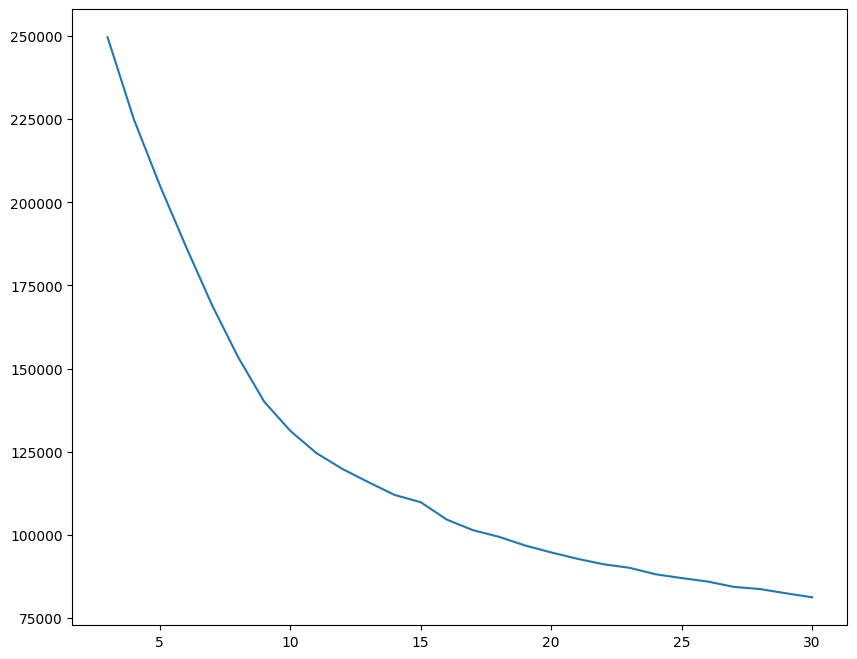

In [20]:
X = scaler.fit_transform(df.values)
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

We got lucky! There is somewhere around 10 clusters in the data.

**Hopkins Statistic**

* For every data point in the given data, calculate nearest neighbor distance and take it's sum. Let this be s.
* Generate random data in the same shape as the given data.
* For the random data calculate the nearest neighbor distance and take it's sum. Let this be r.
* Hopkins statistic score = s/(s+r).
* The intuition is, if the sample data has clusters in it, the nearest-neighbor-distance-sum of sample will be very much smaller than that of random data.
* A very small Hopkins statistic score means the data has very good clusters.

In [21]:
def hopkins_statistic(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25,0.5,0.75]]
    states = [123,42,67,248,654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state=random_state)
            nbrs = NearestNeighbors(n_neighbors=2)
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1]
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist+random_dist)
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic :'+str(hs))
        print('mean hopkins statistic :'+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

hopkins_statistic(df)

------------7025------------
*************************
hopkins statistic :0.6202824222280052
*************************
hopkins statistic :0.6195812827441963
*************************
hopkins statistic :0.6196903147252315
*************************
hopkins statistic :0.6202674883443622
*************************
hopkins statistic :0.6171220683643314
mean hopkins statistic :0.6193887152812254
hopkins statistic standard deviation :0.0011693320231228085
------------14050------------
*************************
hopkins statistic :0.6076858421048457
*************************
hopkins statistic :0.6095683690469749
*************************
hopkins statistic :0.6075442331807254
*************************
hopkins statistic :0.607046987246536
*************************
hopkins statistic :0.6080174890447522
mean hopkins statistic :0.6079725841247667
hopkins statistic standard deviation :0.0008568525039965333
------------21075------------
*************************
hopkins statistic :0.6016963939077765
**

We take different number of samples from the data and generate random data with different seeds and calculate hopkins statistic for each. The Hopkins statistic score is bad. Let's proceed with the analysis.

Kth Nearest Data point
* Calculate the sum of distances of kth nearest neighbor of all the data points in the given data.
* Plot the value of the sum against k.
* If there is a sharp decline in the rate of change of y at some value of k, then there are clusters in the data.

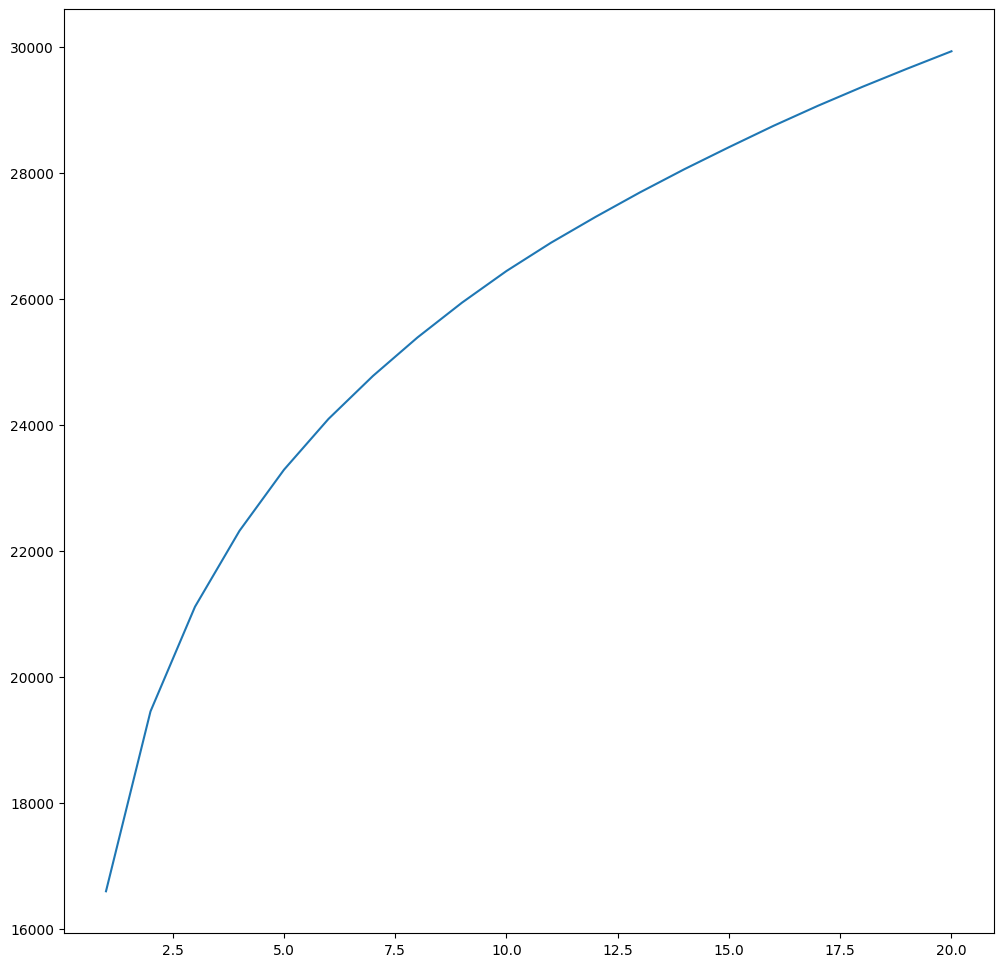

In [22]:
def kth_nearest_data_point(df, k_max):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    ks = range(1,k_max+1)
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)
    nbrs = NearestNeighbors(n_neighbors=k_max)
    nbrs.fit(X)
    kneighbors_result = nbrs.kneighbors()[0]
    kth_neighbor_dist = list(np.sum(kneighbors_result, axis=0))
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, kth_neighbor_dist);
    plt.show()

kth_nearest_data_point(df, 20)

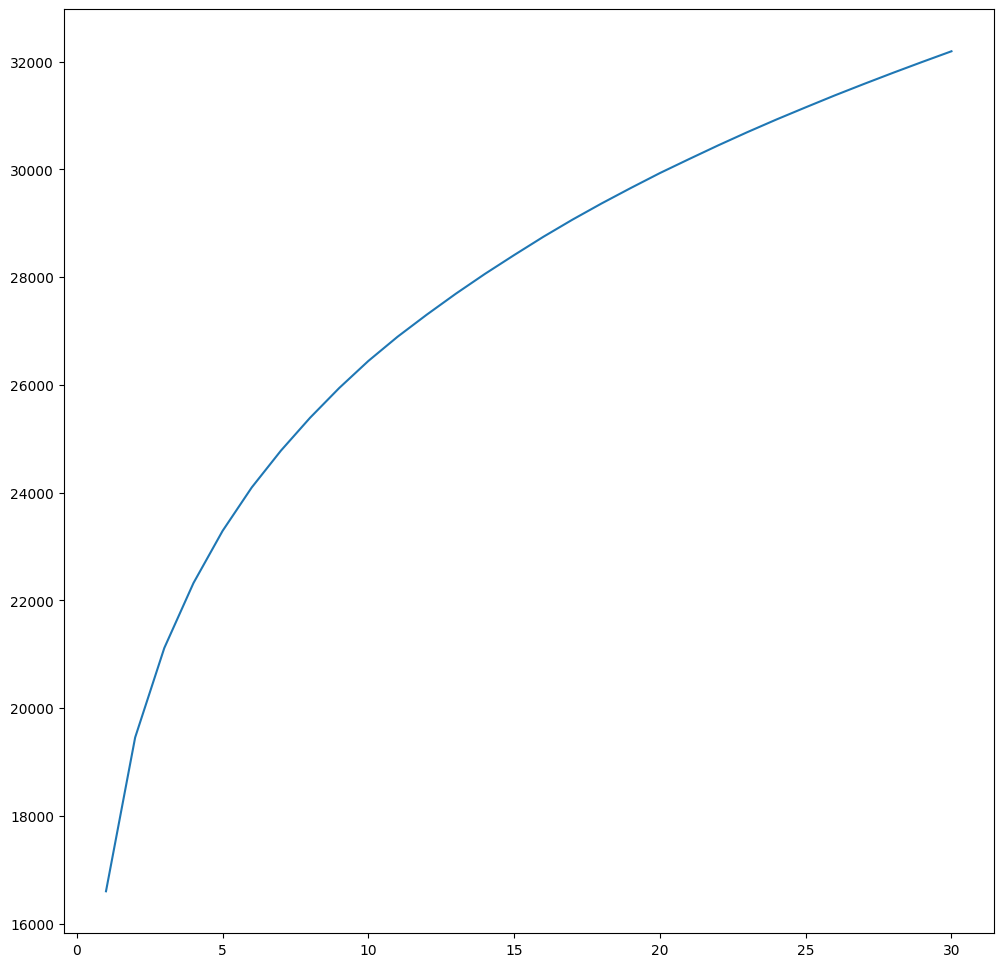

In [23]:
kth_nearest_data_point(df,30)

**Silhoutte Score**


\begin{align}
  S = \frac{(b_i – a_i)}{max(a_i, b_i)}
  \end{align}

* a(i) is the average intra-cluster distance i.e the average distance between each point within a cluster.
* b(i) is the mean distance between the observation and all other data points of the next nearest cluster
* If a data point is more similar to its own cluster and very much different from other clusters, then a(i)<<b(i), the greater will be the silhoutte score.
* The silhoutte score we plot is the average of it over all the data points.


**Points to Remember While Calculating Silhouette Coefficient:**

* The value of the silhouette coefﬁcient is between [-1, 1].
* A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
* The worst value is -1. Values near 0 denote overlapping clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

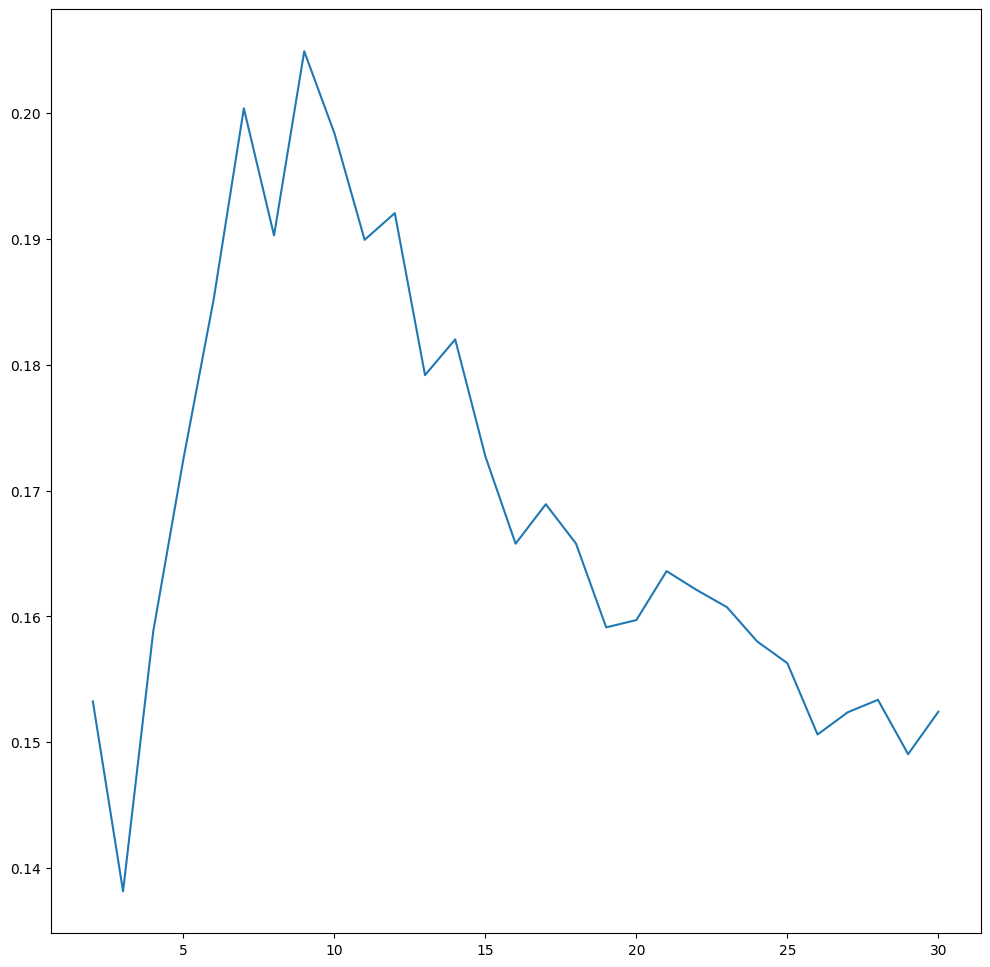

In [24]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))

    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

plot_silhoutte_score(X,30)

We plot number of clusters vs silhoutte score, the silhoutte score hits it's maximum at around 10 clusters.

**Soft clustering**
* In soft clustering every point is a part of every cluster with a certain probability.
* Gaussian Mixture Model is a soft clustering algorithm which uses Estimation Maximization algorithm to learn the parameters.
* The following function finds the best covariance type and number of components based on bayesian information criterion.

In [25]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components+1)
    cv_types = ['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.55, bottom=.02)
    plt.show()
    return best_gmm

<ipython-input-25-3d0ec80a9ea5>:55: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)


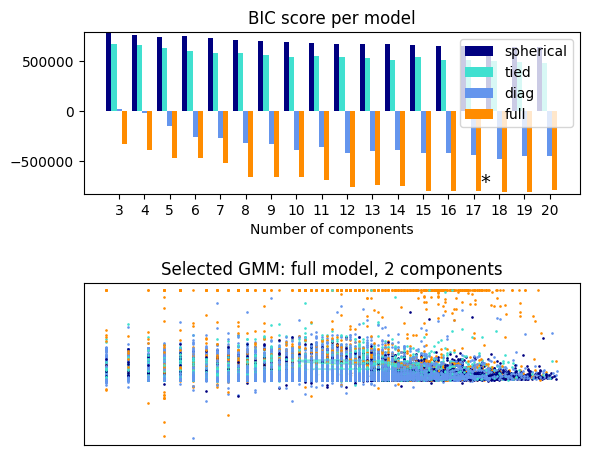

In [26]:
gmm = ncomponents_of_gmm(X, 3, 20)

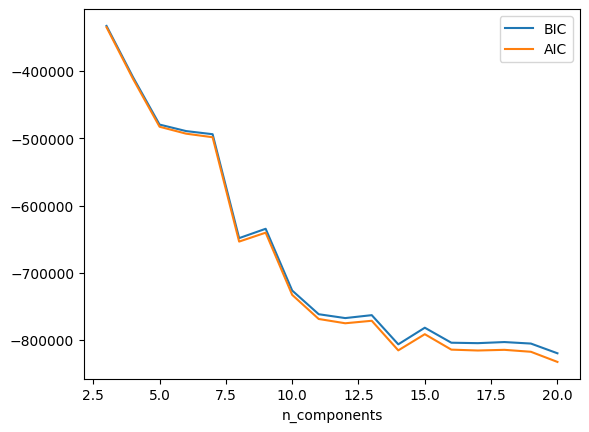

In [31]:
n_components_range = range(3,21)

from sklearn.mixture import GaussianMixture as GMM
#models = [GMM(n, covariance_type='full', random_state=0)
          #for n in n_components_range]
#aics = [model.fit(X).aic(X) for model in models]
#lt.plot(n_components_range, aics);

models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components_range]

plt.plot(n_components_range, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components_range, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# 7. Clustering and interpretation


In [32]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
frame[frame['labels']==0]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0             0      0           45      23.03        4    13   9.46   87.06   
1             0      1           38       1.22        5    13  15.87   75.80   
2             0      2           51      18.08        4    13  16.88   56.75   
4             1      4           53      18.31        2    11  24.13   60.38   
5             1      5            8      23.89        4    13   0.00  100.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29968     10220  29968           19       2.01        2     8  20.54   52.23   
29973     10222  29973           20       3.95        1     8  17.51   59.08   
29975     10224  29975           27       0.00        4    12  38.09   56.94   
29980     10228  29980           31      32.89        1    23  24.12   34.54   
29981     10228  29981           27      27.91        2    12  19.43   53.57   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  
0         3.48   0.00     0.00     0.00   0.00   0.00       0  
1         6.22   2.12     0.00     0.00   0.00   0.00       0  
2         3.37  16.48     6.53     0.00   0.00   0.00       0  
4         7.78   7.72     0.00     0.00   0.00   0.00       0  
5         0.00   0.00     0.00     0.00   0.00   0.00       0  
...        ...    ...      ...      ...    ...    ...     ...  
29968     0.00   0.00     0.00     0.00  27.23   0.00       0  
29973     6.71   0.00    10.39     0.00   0.00   6.31       0  
29975     4.96   0.00     0.00     0.00   0.00   0.00       0  
29980    26.02   7.38     7.94     0.00   0.00   0.00       0  
29981     2.80   7.98     3.57    12.66   0.00   0.00       0  

[6204 rows x 15 columns]

In [34]:
frame[frame['labels']==0].describe()

customer         order  total_items    discount%      weekday  \
count   6204.000000   6204.000000  6204.000000  6204.000000  6204.000000   
mean    5394.115248  16150.581077    38.298356     5.280706     2.997099   
std     2787.051286   8380.710343    18.525663     6.681938     1.745723   
min        0.000000      0.000000     6.000000     0.000000     1.000000   
25%     3393.000000   9744.750000    26.000000     1.010000     1.000000   
50%     5670.000000  16856.500000    34.000000     3.045000     3.000000   
75%     7776.000000  23483.250000    47.000000     6.862500     4.000000   
max    10228.000000  29981.000000   139.000000    65.100000     7.000000   

              hour        Food%      Fresh%      Drinks%        Home%  \
count  6204.000000  6204.000000  6204.00000  6204.000000  6204.000000   
mean     15.019665    18.597987    55.74001    13.439304     6.357984   
std       5.875318    10.759078    15.73442    10.444187     7.582779   
min       0.000000     0.000000    21.77000     0.000000     0.000000   
25%      11.000000    10.720000    43.62750     5.600000     0.000000   
50%      15.000000    17.760000    53.85000    11.705000     3.740000   
75%      20.000000    25.720000    66.05000    19.485000    10.140000   
max      23.000000    57.580000   100.00000    53.780000    40.470000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  6204.000000  6204.000000  6204.000000  6204.000000  6204.0  
mean      2.647959     0.488356     2.140980     0.521575     0.0  
std       4.546021     1.988186     6.444231     2.371932     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.0  
25%       0.000000     0.000000     0.000000     0.000000     0.0  
50%       0.000000     0.000000     0.000000     0.000000     0.0  
75%       3.942500     0.000000     0.000000     0.000000     0.0  
max      26.250000    17.030000    48.620000    23.060000     0.0

* These class of people seem to order beauty products a lot.
*  They must be beauty concious people, let's call them beauty concious.

In [35]:
frame.loc[frame['labels']==0, 'class'] = 'beauty_concious'
frame[frame['labels']==1]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
11            1     11            7      15.00        1     8   0.00   39.93   
96            8     96           32      24.44        4    22   7.18   33.83   
140          18    140           16      21.57        4    13   1.69   36.07   
164          27    164           15       8.69        7    11  31.68    0.00   
165          27    165           23       0.00        7    12  25.35    6.84   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29958     10215  29958           15       3.18        1    13   6.47   20.15   
29988     10231  29988            8       0.52        4     9  28.21    0.00   
29991     10231  29991           15       3.92        5    11  23.38   35.70   
29997     10237  29997           54       0.00        4    17   9.25    0.00   
29998     10237  29998           10       0.00        5    10   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
11       60.07   0.00     0.00      0.0   0.00    0.0       1   NaN  
96       53.07   5.92     0.00      0.0   0.00    0.0       1   NaN  
140      62.24   0.00     0.00      0.0   0.00    0.0       1   NaN  
164      61.41   2.76     4.15      0.0   0.00    0.0       1   NaN  
165      61.86   5.95     0.00      0.0   0.00    0.0       1   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29958    51.74  10.27     0.00      0.0  11.37    0.0       1   NaN  
29988    48.34  23.44     0.00      0.0   0.00    0.0       1   NaN  
29991    40.92   0.00     0.00      0.0   0.00    0.0       1   NaN  
29997    77.48  13.27     0.00      0.0   0.00    0.0       1   NaN  
29998   100.00   0.00     0.00      0.0   0.00    0.0       1   NaN  

[3371 rows x 16 columns]

In [36]:
frame[frame['labels']==1].describe()

customer         order  total_items    discount%      weekday  \
count   3371.000000   3371.000000  3371.000000  3371.000000  3371.000000   
mean    4986.710768  14933.887867    23.461881     5.615571     3.391575   
std     2921.789648   8755.399473    11.726607     7.953832     1.876856   
min        1.000000     11.000000     6.000000   -65.150000     1.000000   
25%     2317.500000   6812.500000    15.000000     0.645000     2.000000   
50%     5017.000000  14944.000000    22.000000     3.490000     3.000000   
75%     7560.000000  22767.500000    30.000000     7.750000     5.000000   
max    10237.000000  29998.000000    98.000000    66.140000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  3371.000000  3371.000000  3371.000000  3371.000000  3371.000000   
mean     14.639869    12.247182     5.815657    69.122195     7.912486   
std       5.464664    11.789060     9.809335    17.996007    10.044178   
min       0.000000     0.000000     0.000000    19.490000     0.000000   
25%      11.000000     0.000000     0.000000    54.830000     0.000000   
50%      15.000000    10.260000     0.000000    65.130000     3.240000   
75%      19.000000    20.065000     9.190000    82.445000    13.930000   
max      23.000000    59.130000    55.780000   100.000000    43.230000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  3371.000000  3371.000000  3371.000000  3371.000000  3371.0  
mean      2.108641     0.219846     2.073800     0.318641     1.0  
std       4.799129     1.409475     6.938417     2.116427     0.0  
min       0.000000     0.000000     0.000000     0.000000     1.0  
25%       0.000000     0.000000     0.000000     0.000000     1.0  
50%       0.000000     0.000000     0.000000     0.000000     1.0  
75%       0.000000     0.000000     0.000000     0.000000     1.0  
max      29.400000    16.720000    45.820000    24.660000     1.0

* These are the class of people who have ordered drinks a lot.
* These people had to face a lot of extra charges for drink purchases.
* They are potential customers, as we all know drinks can be addictive atleast in a teeny tiny level.

In [37]:
frame.loc[frame['labels']==1, 'class'] = 'drink_buyers'
frame[frame['labels']==2]

customer  order  total_items  discount%  weekday  hour   Food%  Fresh%  \
15            1     15           27      21.80        1     9   48.23   20.37   
24            3     24           28       2.21        1    10   36.51   31.93   
36            3     36            9       2.86        2    11   55.24   44.76   
43            3     43           20       0.41        2    13   65.64   12.36   
49            4     49            7       3.06        1    13  100.00    0.00   
...         ...    ...          ...        ...      ...   ...     ...     ...   
29969     10221  29969           36       0.00        4    11  100.00    0.00   
29970     10221  29970           25       3.56        2    14   67.28    0.00   
29971     10221  29971           25       4.06        2    13  100.00    0.00   
29972     10221  29972           31       3.67        3    12   95.73    0.00   
29989     10231  29989           15       7.70        1     0   61.32    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
15       15.38   8.29     7.73      0.0    0.0    0.0       2   NaN  
24       27.18   4.38     0.00      0.0    0.0    0.0       2   NaN  
36        0.00   0.00     0.00      0.0    0.0    0.0       2   NaN  
43       21.99   0.00     0.00      0.0    0.0    0.0       2   NaN  
49        0.00   0.00     0.00      0.0    0.0    0.0       2   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29969     0.00   0.00     0.00      0.0    0.0    0.0       2   NaN  
29970    32.72   0.00     0.00      0.0    0.0    0.0       2   NaN  
29971     0.00   0.00     0.00      0.0    0.0    0.0       2   NaN  
29972     4.27   0.00     0.00      0.0    0.0    0.0       2   NaN  
29989    23.34  15.34     0.00      0.0    0.0    0.0       2   NaN  

[5558 rows x 16 columns]

In [38]:
frame[frame['labels']==2].describe()

customer         order  total_items    discount%      weekday  \
count   5558.000000   5558.000000  5558.000000  5558.000000  5558.000000   
mean    5051.793991  15124.945304    38.000000     6.052729     2.397265   
std     2922.447214   8761.917638    18.762613     7.227432     1.319340   
min        1.000000     15.000000     6.000000   -11.990000     1.000000   
25%     2551.750000   7512.750000    26.000000     1.482500     1.000000   
50%     5158.000000  15336.000000    34.000000     3.780000     2.000000   
75%     7521.000000  22650.750000    47.000000     7.900000     3.000000   
max    10231.000000  29989.000000   134.000000    51.900000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  5558.000000  5558.000000  5558.000000  5558.000000  5558.000000   
mean     14.899604    45.874095    11.447999    23.091236    11.273006   
std       5.757376    19.864890    11.822204    13.653663    10.242583   
min       0.000000     4.140000     0.000000     0.000000     0.000000   
25%      11.000000    31.602500     0.000000    12.870000     0.685000   
50%      15.000000    42.295000     8.685000    22.815000     9.555000   
75%      20.000000    55.610000    21.187500    33.000000    18.750000   
max      23.000000   100.000000    44.850000    61.790000    49.810000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  5558.000000  5558.000000  5558.000000  5558.000000  5558.0  
mean      3.835561     0.536076     3.180036     0.632524     2.0  
std       5.715295     2.025867     8.211273     2.712101     0.0  
min       0.000000     0.000000     0.000000     0.000000     2.0  
25%       0.000000     0.000000     0.000000     0.000000     2.0  
50%       0.000000     0.000000     0.000000     0.000000     2.0  
75%       6.400000     0.000000     0.000000     0.000000     2.0  
max      29.540000    15.630000    52.070000    22.670000     2.0

* These are again very loyal customers who depend on ulabox for a lot of things.
* They tend to buy grocery a little more, let's call them loyals grocery.

In [39]:
frame.loc[frame['labels']==2, 'class'] = 'loyals_grocery'
frame[frame['labels']==3]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
107           9    107           29       8.02        7    10  25.62   19.48   
111          10    111           23      15.94        1    19   9.37    0.00   
112          10    112           26       6.93        3    22   4.93    0.00   
152          22    152           31       5.19        7    16   9.96   13.96   
158          25    158           23       1.30        2    19   1.74   18.27   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29894     10192  29894           25      36.56        6    11   5.24    0.00   
29900     10195  29900            6      25.00        2    13   0.00    0.00   
29920     10200  29920            7       1.74        5    11   0.00    0.00   
29936     10205  29936           22      13.43        3    20  12.04    0.00   
29979     10227  29979           37      15.57        1    13   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
107      17.34   8.28    29.27     0.00   0.00    0.0       3   NaN  
111       0.00  42.45    48.18     0.00   0.00    0.0       3   NaN  
112       0.00  34.17    54.72     6.17   0.00    0.0       3   NaN  
152      21.65  21.51    27.56     0.00   5.35    0.0       3   NaN  
158      21.33  25.14    24.13     9.39   0.00    0.0       3   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29894    14.56  45.24    31.06     0.00   0.00    3.9       3   NaN  
29900     0.00   0.00   100.00     0.00   0.00    0.0       3   NaN  
29920    13.79  23.37    62.84     0.00   0.00    0.0       3   NaN  
29936    47.67   0.00    40.28     0.00   0.00    0.0       3   NaN  
29979     0.00   0.00    90.67     0.00   9.33    0.0       3   NaN  

[1093 rows x 16 columns]

In [40]:
frame[frame['labels']==3].describe()

customer         order  total_items    discount%      weekday  \
count   1093.000000   1093.000000  1093.000000  1093.000000  1093.000000   
mean    4427.609332  13239.655993    25.385178    11.605892     3.740165   
std     3021.110626   9020.787245    13.745224    11.994341     2.137706   
min        9.000000    107.000000     6.000000    -7.810000     1.000000   
25%     1664.000000   4988.000000    16.000000     2.690000     2.000000   
50%     3971.000000  11756.000000    24.000000     7.860000     3.000000   
75%     7030.000000  21025.000000    31.000000    16.150000     6.000000   
max    10227.000000  29979.000000   139.000000    61.860000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  1093.000000  1093.000000  1093.000000  1093.000000  1093.000000   
mean     14.922232    15.986670     8.511610    15.180952    13.865233   
std       5.846353    13.939299    13.011384    14.466779    14.453474   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     3.580000     0.000000     0.000000     0.000000   
50%      15.000000    14.290000     0.000000    12.130000     9.590000   
75%      20.000000    24.720000    14.800000    23.730000    23.930000   
max      23.000000    73.090000    68.770000    69.630000    65.060000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  1093.000000  1093.000000  1093.000000  1093.000000  1093.0  
mean     41.065014     0.859735     3.895087     0.377255     3.0  
std      19.336797     3.200309    10.432381     2.286925     0.0  
min      19.230000     0.000000     0.000000     0.000000     3.0  
25%      28.290000     0.000000     0.000000     0.000000     3.0  
50%      33.870000     0.000000     0.000000     0.000000     3.0  
75%      46.420000     0.000000     0.000000     0.000000     3.0  
max     100.000000    24.790000    63.450000    24.090000     3.0

* These customers buy all kinds of products from ulabox, fresh, drinks and food dominnantly.
* These are the loyal customers of ulabox who depends on ulabox for everything.
* Let's call them loyals.

In [41]:
frame.loc[frame['labels']==3, 'class'] = 'loyals'
frame[frame['labels']==4]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23            2     23           26       2.97        6    23  24.10   22.29   
55            4     55           23       5.81        7    21   0.00   53.76   
70            4     70           18      17.78        7    11  47.05   36.73   
85            6     85           46       0.49        7    15  42.61   32.52   
118          12    118           83       1.84        7    17  32.36    7.83   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29854     10171  29854           40       1.02        6    16  23.18   24.99   
29922     10200  29922           50       4.31        7    19  24.77   35.44   
29930     10201  29930           41      40.08        7    23  33.02    0.00   
29944     10209  29944           25       0.90        7    20  29.02   27.84   
29990     10231  29990           22       8.97        7    12  29.74   28.72   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
23       38.69  14.92     0.00      0.0   0.00    0.0       4   NaN  
55       33.55  12.69     0.00      0.0   0.00    0.0       4   NaN  
70        7.79   8.42     0.00      0.0   0.00    0.0       4   NaN  
85        5.59   3.52     1.99      0.0  13.78    0.0       4   NaN  
118      15.68   9.94     5.68      1.3  27.21    0.0       4   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29854    12.89   4.78     4.99      0.0  29.17    0.0       4   NaN  
29922    12.99  11.85    14.95      0.0   0.00    0.0       4   NaN  
29930    17.78  33.73    15.46      0.0   0.00    0.0       4   NaN  
29944     8.58   1.28     0.00      0.0  33.28    0.0       4   NaN  
29990    19.52  22.02     0.00      0.0   0.00    0.0       4   NaN  

[5010 rows x 16 columns]

In [42]:
frame[frame['labels']==4].describe()

customer         order  total_items    discount%      weekday  \
count   5010.000000   5010.000000  5010.000000  5010.000000  5010.000000   
mean    4932.900000  14763.486228    42.420160     6.551188     6.245309   
std     2774.060611   8327.474331    19.596654     6.961456     1.020797   
min        2.000000     23.000000     7.000000    -8.070000     3.000000   
25%     2710.000000   7855.250000    29.000000     1.840000     6.000000   
50%     4840.000000  14437.500000    37.000000     4.420000     7.000000   
75%     7299.750000  21893.000000    51.000000     8.810000     7.000000   
max    10231.000000  29990.000000   140.000000    52.450000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  5010.000000  5010.000000  5010.000000  5010.000000  5010.000000   
mean     16.015369    27.802752    23.308505    23.337559    13.697150   
std       5.543019    13.835596    16.629004    13.318917    11.028666   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.000000    17.762500     8.992500    13.062500     4.482500   
50%      17.000000    26.580000    23.060000    21.625000    11.560000   
75%      21.000000    36.060000    35.800000    32.500000    21.425000   
max      23.000000    87.270000    64.590000    77.040000    47.980000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  5010.000000  5010.000000  5010.000000  5010.000000  5010.0  
mean      5.218293     0.649527     5.180729     0.673146     4.0  
std       6.439316     2.306372    10.540586     2.845397     0.0  
min       0.000000     0.000000     0.000000     0.000000     4.0  
25%       0.000000     0.000000     0.000000     0.000000     4.0  
50%       2.695000     0.000000     0.000000     0.000000     4.0  
75%       8.817500     0.000000     3.192500     0.000000     4.0  
max      29.020000    15.840000    52.350000    23.720000     4.0

* This should be the class of orders that buy a lot of home utility products like floor cleaner, curtains, washing powder etc.
* Let's call this people home decorators.

In [43]:
frame.loc[frame['labels']==4, 'class'] = 'home_decorators'
frame[frame['labels']==5]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
33            3     33           36      15.02        1    12  27.55   22.82   
115          11    115           24      16.27        4    21  17.02    3.77   
120          12    120           26       0.53        5    13  29.91    3.33   
121          12    121           26       4.11        1    12  12.05    7.99   
125          12    125           40       2.09        3    15  23.18    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29957     10215  29957           28       7.14        4    15  33.14   13.10   
29961     10217  29961            6      22.04        7    19   0.00    0.00   
29976     10225  29976            8       3.06        4    12   0.00    0.00   
29985     10230  29985           13       4.94        1    23  13.33    0.00   
29986     10230  29986           12       5.00        3    14  14.37    0.00   

       Drinks%  Home%  Beauty%  Health%   Baby%  Pets%  labels class  
33        5.96   0.00     0.00      0.0   43.67    0.0       5   NaN  
115       3.12   0.00     0.00      0.0   76.10    0.0       5   NaN  
120      21.63   6.65     0.00      0.0   38.48    0.0       5   NaN  
121      15.80  24.65     0.00      0.0   39.51    0.0       5   NaN  
125      10.95  15.49     0.00      0.0   50.38    0.0       5   NaN  
...        ...    ...      ...      ...     ...    ...     ...   ...  
29957     8.63   3.42     0.00      0.0   41.71    0.0       5   NaN  
29961     0.00   0.00     0.00      0.0  100.00    0.0       5   NaN  
29976     0.00   0.00     0.00      0.0  100.00    0.0       5   NaN  
29985    13.99   4.90     6.39      0.0   61.39    0.0       5   NaN  
29986    11.84   3.92     2.38      0.0   67.49    0.0       5   NaN  

[2536 rows x 16 columns]

In [44]:
frame[frame['labels']==5].describe()

customer         order  total_items    discount%      weekday  \
count   2536.000000   2536.000000  2536.000000  2536.000000  2536.000000   
mean    4881.123028  14598.610410    18.248028     8.955079     3.650631   
std     2837.509874   8505.995091    11.164910     9.987285     2.224169   
min        3.000000     33.000000     6.000000   -23.890000     1.000000   
25%     2408.000000   7126.500000    10.000000     1.060000     2.000000   
50%     4889.000000  14589.000000    16.000000     4.765000     3.000000   
75%     7116.000000  21331.250000    23.000000    14.745000     6.000000   
max    10230.000000  29986.000000   126.000000    53.290000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  2536.000000  2536.000000  2536.000000  2536.000000  2536.000000   
mean     15.080836     7.446191     4.512733    12.874748     7.781881   
std       5.994752     9.190798     8.172189    12.315067    10.455540   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     0.000000     0.000000     0.000000     0.000000   
50%      15.000000     4.310000     0.000000    10.395000     3.040000   
75%      21.000000    11.960000     6.240000    20.842500    12.765000   
max      23.000000    57.680000    45.850000    56.030000    53.110000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  2536.000000  2536.000000  2536.000000  2536.000000  2536.0  
mean      2.469519     0.452133    64.065509     0.230091     5.0  
std       5.097624     2.230010    19.765593     1.745842     0.0  
min       0.000000     0.000000    26.030000     0.000000     5.0  
25%       0.000000     0.000000    47.400000     0.000000     5.0  
50%       0.000000     0.000000    59.915000     0.000000     5.0  
75%       2.740000     0.000000    79.660000     0.000000     5.0  
max      33.730000    18.970000   100.000000    25.040000     5.0

* This class of orders buy a lot of Food, Fresh and Drinks. With Fresh being more dominant.
* These orders might be a little valuable, as these orders cover Food%, Fresh%, Drinnks%, Home%.

In [45]:
frame.loc[frame['labels']==5, 'class'] = 'loyals_fresh'
frame[frame['labels']==6]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
3             1      3           57      16.51        1    12  28.81   35.99   
18            1     18           31      16.49        1    12  24.27   33.09   
22            1     22           36      16.62        5     9  18.66   47.13   
101           9    101           15       6.27        7    10  18.10   62.86   
103           9    103           17       4.36        7    23   2.62   25.94   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29826     10161  29826            6      14.98        4    12   0.00   24.00   
29844     10167  29844           26       2.78        5    18  33.34   15.70   
29895     10192  29895           21       7.94        7    14   5.46    0.00   
29956     10214  29956           20       9.95        2     1  11.46   46.20   
29978     10227  29978           22      24.90        4    13   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
3        11.78   4.62     2.87    15.92    0.0   0.00       6   NaN  
18       16.18   0.00     0.00    26.47    0.0   0.00       6   NaN  
22       17.50   0.00     0.00    16.71    0.0   0.00       6   NaN  
101       0.00   0.00     0.00    19.05    0.0   0.00       6   NaN  
103      50.35   0.00     0.00    21.08    0.0   0.00       6   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29826    17.04   0.00    24.74    34.23    0.0   0.00       6   NaN  
29844    19.04   0.00     3.53    28.39    0.0   0.00       6   NaN  
29895    16.01  20.47    15.22    19.39    0.0  23.45       6   NaN  
29956    17.55   0.00     0.00    24.78    0.0   0.00       6   NaN  
29978     0.00   0.00    55.96    44.04    0.0   0.00       6   NaN  

[692 rows x 16 columns]

In [46]:
frame[frame['labels']==6].describe()

customer         order  total_items   discount%     weekday  \
count    692.000000    692.000000   692.000000  692.000000  692.000000   
mean    4718.926301  14123.699422    25.343931    5.687991    3.715318   
std     2933.775330   8785.204888    13.682578    8.269850    2.127933   
min        1.000000      3.000000     6.000000   -5.540000    1.000000   
25%     2166.000000   6422.000000    16.000000    0.760000    2.000000   
50%     4801.000000  14300.500000    23.000000    2.830000    3.000000   
75%     7163.000000  21467.250000    32.000000    7.167500    6.000000   
max    10227.000000  29978.000000   113.000000   52.490000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  692.000000  692.000000  692.000000  692.000000  692.000000  692.000000   
mean    14.771676   18.569277   12.165217   17.132702   11.733974    6.906980   
std      5.952286   14.785579   15.623724   15.207900   13.305735   10.073175   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    6.957500    0.000000    5.005000    0.000000    0.000000   
50%     15.000000   16.880000    4.160000   14.640000    7.630000    2.595000   
75%     20.000000   26.300000   21.870000   24.925000   18.492500   10.315000   
max     23.000000   77.690000   75.060000   81.140000   72.470000   65.470000   

          Health%       Baby%       Pets%  labels  
count  692.000000  692.000000  692.000000   692.0  
mean    26.749653    5.824408    0.849046     6.0  
std     13.754595   13.929679    3.620946     0.0  
min     12.800000    0.000000    0.000000     6.0  
25%     17.650000    0.000000    0.000000     6.0  
50%     22.125000    0.000000    0.000000     6.0  
75%     31.332500    0.000000    0.000000     6.0  
max    100.000000   71.000000   36.980000     6.0

* These class of people have brought baby products a lot.
* They must be couple with new babies, let's call them new parents.

In [47]:
frame.loc[frame['labels']==6, 'class'] = 'new_parents'
frame[frame['labels']==7]

customer  order  total_items  discount%  weekday  hour   Food%  Fresh%  \
435         100    435           38      49.11        1    21   98.15    0.00   
436         100    436           78      51.85        3    16   69.90    0.00   
437         100    437           78      46.89        2    19   84.86    0.00   
438         100    438          135      52.00        7    22   73.57    0.00   
965         260    965           23     100.00        2    11   20.50   41.56   
...         ...    ...          ...        ...      ...   ...     ...     ...   
29131      9856  29131           15     100.00        3     3  100.00    0.00   
29538     10025  29538          122     100.00        6    20  100.00    0.00   
29769     10129  29769           24     100.00        2    12  100.00    0.00   
29770     10129  29770           23     100.00        2    12  100.00    0.00   
29881     10185  29881            7      48.50        4     3   97.01    2.99   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
435       1.85   0.00     0.00      0.0   0.00    0.0       7   NaN  
436      29.01   0.00     0.00      0.0   1.09    0.0       7   NaN  
437       7.79   4.24     0.00      0.0   3.11    0.0       7   NaN  
438      24.68   0.00     0.00      0.0   0.00    0.0       7   NaN  
965      22.99   9.03     5.92      0.0   0.00    0.0       7   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29131     0.00   0.00     0.00      0.0   0.00    0.0       7   NaN  
29538     0.00   0.00     0.00      0.0   0.00    0.0       7   NaN  
29769     0.00   0.00     0.00      0.0   0.00    0.0       7   NaN  
29770     0.00   0.00     0.00      0.0   0.00    0.0       7   NaN  
29881     0.00   0.00     0.00      0.0   0.00    0.0       7   NaN  

[508 rows x 16 columns]

In [48]:
frame[frame['labels']==7].describe()

customer         order  total_items   discount%     weekday  \
count    508.000000    508.000000   508.000000  508.000000  508.000000   
mean    3206.096457   9527.269685    46.505906   93.660669    3.618110   
std     2247.559475   6716.136940    24.481406   14.194915    2.028356   
min      100.000000    435.000000     6.000000   42.080000    1.000000   
25%     1645.000000   4908.750000    27.000000  100.000000    2.000000   
50%     2562.500000   7530.500000    46.000000  100.000000    3.000000   
75%     3493.000000  10111.000000    63.000000  100.000000    5.000000   
max    10185.000000  29881.000000   135.000000  100.000000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  508.000000  508.000000  508.000000  508.000000  508.000000  508.000000   
mean    15.250000   93.486555    2.278051    2.227461    0.950610    0.437795   
std      5.016983   17.993631   11.090136    7.638611    4.762739    2.603846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
50%     15.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
75%     19.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
max     23.000000  100.000000  100.000000   75.020000   37.410000   33.070000   

          Health%       Baby%       Pets%  labels  
count  508.000000  508.000000  508.000000   508.0  
mean     0.082480    0.371594    0.141398     7.0  
std      0.973703    2.973087    1.727924     0.0  
min      0.000000    0.000000    0.000000     7.0  
25%      0.000000    0.000000    0.000000     7.0  
50%      0.000000    0.000000    0.000000     7.0  
75%      0.000000    0.000000    0.000000     7.0  
max     15.420000   37.220000   24.080000     7.0

* This is the class of people who had bought a lot of health products, let's call them health concious people

In [49]:
frame.loc[frame['labels']==7, 'class'] = 'health_concious'
frame[frame['labels']==8]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
461         109    461           43       5.75        2    12  22.37     0.0   
551         129    551           12      25.04        2    20   0.00     0.0   
579         141    579           14      11.36        5    22   0.00     0.0   
580         141    580           22       0.00        5     6   0.00     0.0   
622         158    622           28       2.08        5    11  21.41     0.0   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29791     10143  29791           11      21.96        2    16   0.00     0.0   
29893     10192  29893           24      40.37        5    19  24.37     0.0   
29896     10192  29896           35       6.32        3    13   6.03     0.0   
29905     10198  29905           21       7.90        4    19  20.99     0.0   
29906     10198  29906           20       1.92        4    17  12.46     0.0   

       Drinks%  Home%  Beauty%  Health%  Baby%   Pets%  labels class  
461      25.56   3.42    12.18     2.81    0.0   33.65       8   NaN  
551       0.00   0.00     0.00     0.00    0.0  100.00       8   NaN  
579      67.13   0.00     0.00     0.00    0.0   32.87       8   NaN  
580      72.56   0.00     0.00     0.00    0.0   27.44       8   NaN  
622      21.76   8.53     5.68     0.00    0.0   42.61       8   NaN  
...        ...    ...      ...      ...    ...     ...     ...   ...  
29791     0.00   0.00     0.00     0.00    0.0  100.00       8   NaN  
29893    29.13   0.00     0.00     0.00    0.0   46.50       8   NaN  
29896    19.48  20.61    16.11     0.00    0.0   37.77       8   NaN  
29905    11.36  32.31     0.00     0.00    0.0   35.35       8   NaN  
29906     4.46  45.37     0.00     0.00    0.0   37.71       8   NaN  

[340 rows x 16 columns]

In [50]:
frame[frame['labels']==8].describe()

customer         order  total_items   discount%     weekday  \
count    340.000000    340.000000   340.000000  340.000000  340.000000   
mean    4973.758824  14847.520588    24.023529    7.897912    3.502941   
std     2799.961623   8372.245494    14.779382    8.706369    2.088737   
min      109.000000    461.000000     6.000000  -18.060000    1.000000   
25%     2870.250000   8236.000000    15.000000    1.247500    2.000000   
50%     5054.000000  15037.500000    20.000000    5.335000    3.000000   
75%     7199.250000  21584.250000    29.000000   12.175000    5.000000   
max    10198.000000  29906.000000    92.000000   42.420000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  340.000000  340.000000  340.000000  340.000000  340.000000  340.000000   
mean    14.711765   13.806353   10.470235   15.398735   10.455912    3.467059   
std      5.724180   13.054884   15.200191   15.633844   13.118504    7.509435   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    0.000000    0.000000    1.415000    0.000000    0.000000   
50%     14.000000   12.735000    0.000000   11.765000    5.565000    0.000000   
75%     20.000000   21.117500   16.860000   23.520000   16.757500    4.035000   
max     23.000000   55.810000   62.880000   72.560000   69.480000   47.250000   

          Health%       Baby%       Pets%  labels  
count  340.000000  340.000000  340.000000   340.0  
mean     0.469118    2.509941   43.380147     8.0  
std      2.754436    8.846895   21.333940     0.0  
min      0.000000    0.000000   21.980000     8.0  
25%      0.000000    0.000000   28.092500     8.0  
50%      0.000000    0.000000   35.255000     8.0  
75%      0.000000    0.000000   51.155000     8.0  
max     26.290000   71.670000  100.000000     8.0

* This is the class of pet lovers, that's obvious from the data we see

In [51]:
frame.loc[frame['labels']==8, 'class'] = 'pet_lovers'
frame[frame['labels']==9]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
76            5     76           21      11.76        2    23   6.84    0.00   
93            8     93           17      30.60        1    22  24.87    0.00   
119          12    119           21       3.13        4    23  23.02    3.20   
124          12    124           33       0.09        2    22  20.06    0.00   
135          15    135           25      10.98        7    14   0.00   12.29   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29931     10201  29931           21      12.71        4    12  19.58    0.00   
29945     10209  29945           19       1.77        4    19   5.52    8.72   
29974     10223  29974           21      27.09        4    11  33.93    0.00   
29984     10230  29984           31      15.93        4    14  11.65   11.07   
29987     10230  29987           27       9.83        3    14  14.82    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
76       24.02  26.87    10.21     0.00  32.06    0.0       9   NaN  
93       15.77  48.51    10.85     0.00   0.00    0.0       9   NaN  
119      18.48  26.39     3.80     0.00  25.12    0.0       9   NaN  
124      27.57  34.37     0.00     0.00  17.99    0.0       9   NaN  
135      25.54  51.25     6.73     4.19   0.00    0.0       9   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29931    14.86  56.12     9.43     0.00   0.00    0.0       9   NaN  
29945    20.18  36.85     0.00     0.00  28.72    0.0       9   NaN  
29974    17.46  41.46     7.15     0.00   0.00    0.0       9   NaN  
29984    23.11  27.17     0.00     0.00  26.99    0.0       9   NaN  
29987    14.27  44.97     0.00     0.00  25.93    0.0       9   NaN  

[2789 rows x 16 columns]

In [52]:
frame[frame['labels']==9].describe()

customer         order  total_items    discount%      weekday  \
count   2789.000000   2789.000000  2789.000000  2789.000000  2789.000000   
mean    4448.241664  13303.545715    26.498745    12.686838     3.291502   
std     2907.977921   8692.400489    13.804451    10.367640     1.977819   
min        5.000000     76.000000     6.000000   -23.980000     1.000000   
25%     1950.000000   5781.000000    17.000000     4.460000     2.000000   
50%     4118.000000  12266.000000    24.000000    11.100000     3.000000   
75%     6838.000000  20523.000000    32.000000    18.600000     5.000000   
max    10230.000000  29987.000000   122.000000    86.090000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  2789.000000  2789.000000  2789.000000  2789.000000  2789.000000   
mean     14.749014    13.351463     5.612904    19.228171    52.877372   
std       5.556037    11.917897     9.891691    14.781895    17.881068   
min       0.000000     0.000000     0.000000     0.000000    20.080000   
25%      11.000000     2.220000     0.000000     6.290000    40.240000   
50%      15.000000    11.650000     0.000000    18.140000    48.380000   
75%      20.000000    21.110000     7.750000    30.610000    60.750000   
max      23.000000    60.010000    57.270000    58.240000   100.000000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  2789.000000  2789.000000  2789.000000  2789.000000  2789.0  
mean      4.345321     0.455841     3.572775     0.471427     9.0  
std       6.439583     1.975157     8.957933     2.599960     0.0  
min       0.000000     0.000000     0.000000     0.000000     9.0  
25%       0.000000     0.000000     0.000000     0.000000     9.0  
50%       0.000000     0.000000     0.000000     0.000000     9.0  
75%       7.370000     0.000000     0.000000     0.000000     9.0  
max      33.310000    15.230000    49.510000    23.780000     9.0

* This class of customers seem to buy non fresh food a lot, let's call them grocery shoppers.
* These are probably monthly regular shopppers of the company.

In [53]:
frame.loc[frame['labels']==9, 'class'] = 'grocery_shoppers'

# 8. Deriving Conclusions

<Figure size 1800x1800 with 0 Axes>

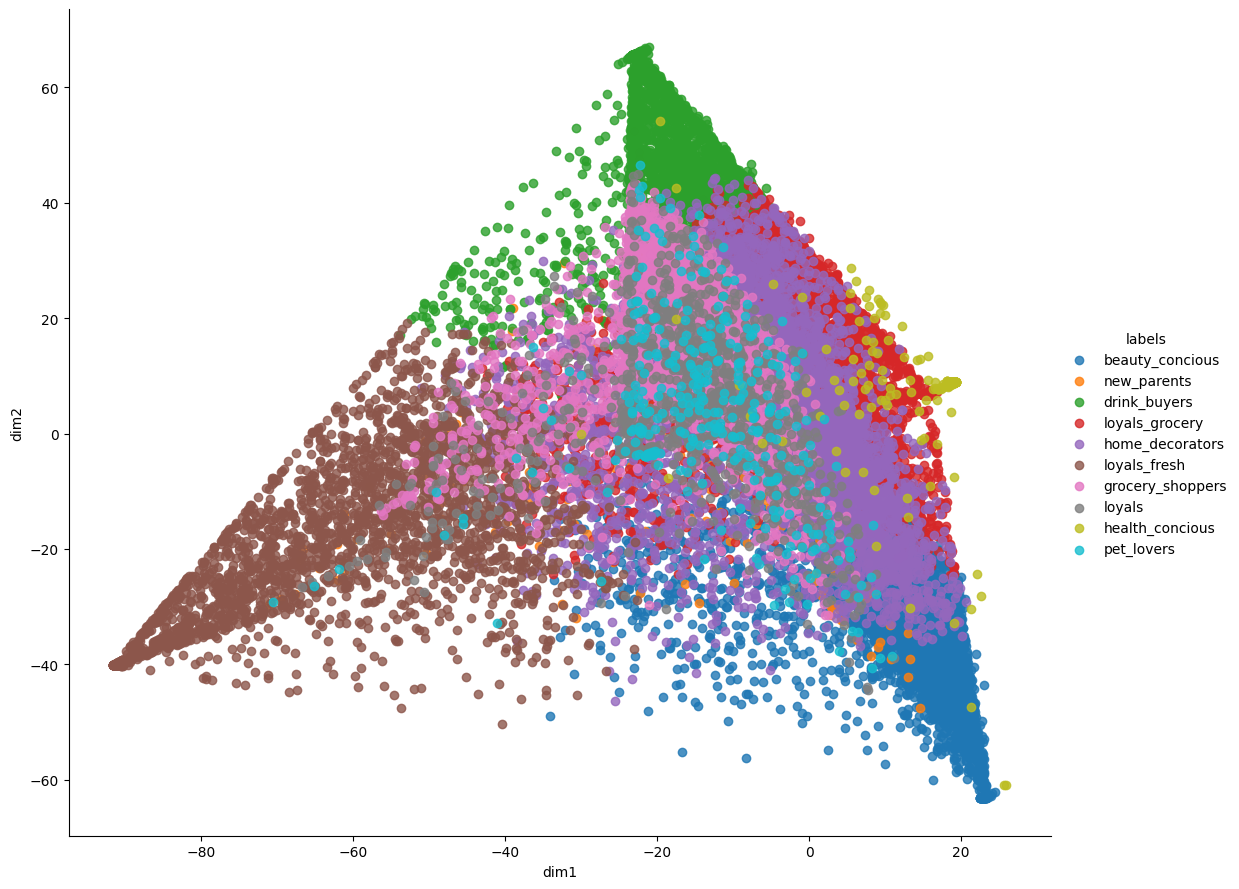

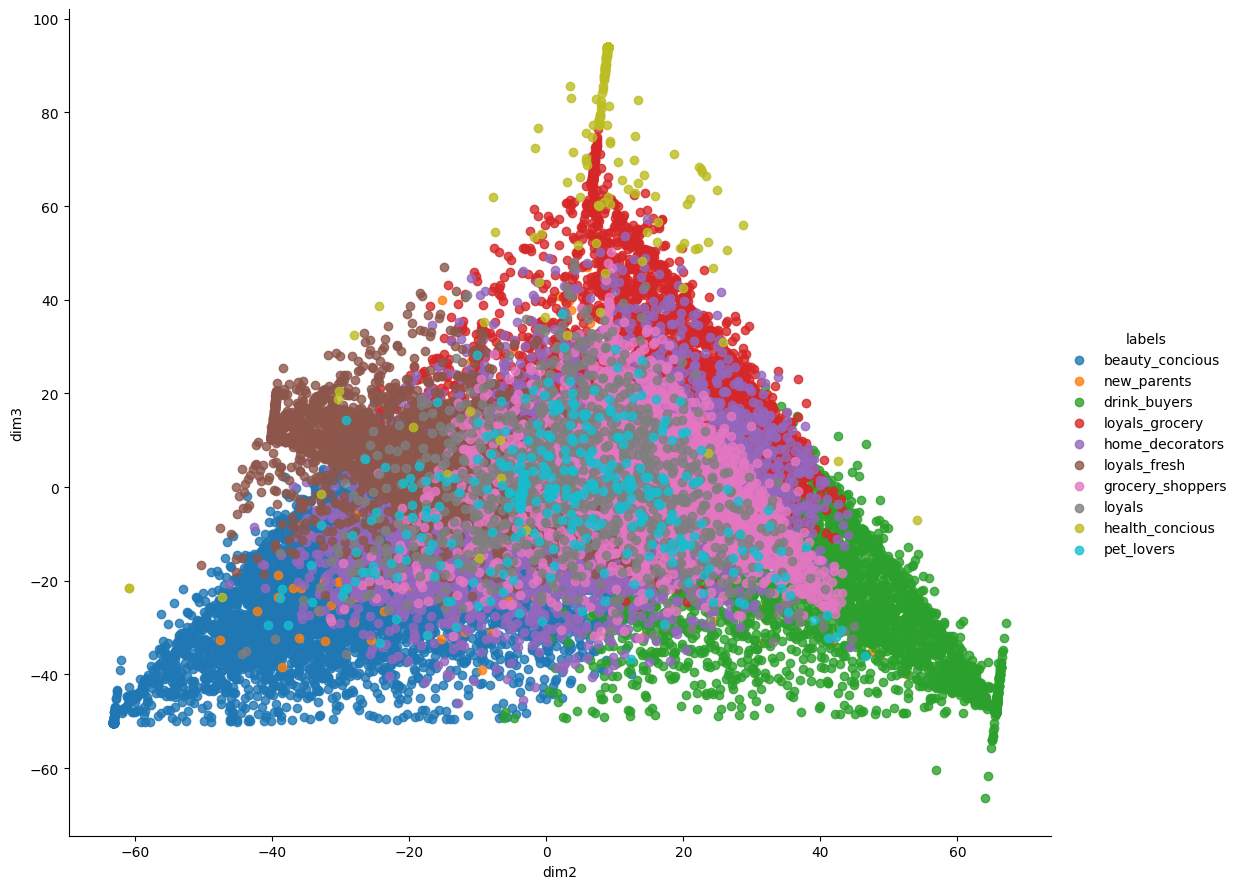

In [79]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, height=9, aspect=1.2);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, height=9, aspect=1.2);
    plt.show()

pca_2d_plot_labels(pca, df, frame)

* From the 2d plot we see that clusters are nicely separated in space.

In [70]:
frame.to_csv('order_segmentation_0.0.csv')

In [71]:
frame.groupby('class')['total_items'].describe()

count       mean        std  min   25%   50%   75%    max
class                                                                       
beauty_concious   6204.0  38.298356  18.525663  6.0  26.0  34.0  47.0  139.0
drink_buyers      3371.0  23.461881  11.726607  6.0  15.0  22.0  30.0   98.0
grocery_shoppers  2789.0  26.498745  13.804451  6.0  17.0  24.0  32.0  122.0
health_concious    508.0  46.505906  24.481406  6.0  27.0  46.0  63.0  135.0
home_decorators   5010.0  42.420160  19.596654  7.0  29.0  37.0  51.0  140.0
loyals            1093.0  25.385178  13.745224  6.0  16.0  24.0  31.0  139.0
loyals_fresh      2536.0  18.248028  11.164910  6.0  10.0  16.0  23.0  126.0
loyals_grocery    5558.0  38.000000  18.762613  6.0  26.0  34.0  47.0  134.0
new_parents        692.0  25.343931  13.682578  6.0  16.0  23.0  32.0  113.0
pet_lovers         340.0  24.023529  14.779382  6.0  15.0  20.0  29.0   92.0

* The variation of total_items with class is not very sound, all classes of orders have similar number of total item counts.

In [72]:
frame.groupby('class')['discount%'].describe()

count       mean        std    min       25%      50%  \
class                                                                      
beauty_concious   6204.0   5.280706   6.681938   0.00    1.0100    3.045   
drink_buyers      3371.0   5.615571   7.953832 -65.15    0.6450    3.490   
grocery_shoppers  2789.0  12.686838  10.367640 -23.98    4.4600   11.100   
health_concious    508.0  93.660669  14.194915  42.08  100.0000  100.000   
home_decorators   5010.0   6.551188   6.961456  -8.07    1.8400    4.420   
loyals            1093.0  11.605892  11.994341  -7.81    2.6900    7.860   
loyals_fresh      2536.0   8.955079   9.987285 -23.89    1.0600    4.765   
loyals_grocery    5558.0   6.052729   7.227432 -11.99    1.4825    3.780   
new_parents        692.0   5.687991   8.269850  -5.54    0.7600    2.830   
pet_lovers         340.0   7.897912   8.706369 -18.06    1.2475    5.335   

                       75%     max  
class                               
beauty_concious     6.8625   65.10  
drink_buyers        7.7500   66.14  
grocery_shoppers   18.6000   86.09  
health_concious   100.0000  100.00  
home_decorators     8.8100   52.45  
loyals             16.1500   61.86  
loyals_fresh       14.7450   53.29  
loyals_grocery      7.9000   51.90  
new_parents         7.1675   52.49  
pet_lovers         12.1750   42.42

* The customers who have placed orders on grocery have been seen to enjoy a lot of discount, may be there was a stock clearance sale or a promotional sale ulabox.

In [73]:
frame = pd.read_csv('order_segmentation_0.0.csv')

In [74]:
frame['class'].value_counts().sort_values(ascending=False)

beauty_concious     6204
loyals_grocery      5558
home_decorators     5010
drink_buyers        3371
grocery_shoppers    2789
loyals_fresh        2536
loyals              1093
new_parents          692
health_concious      508
pet_lovers           340
Name: class, dtype: int64

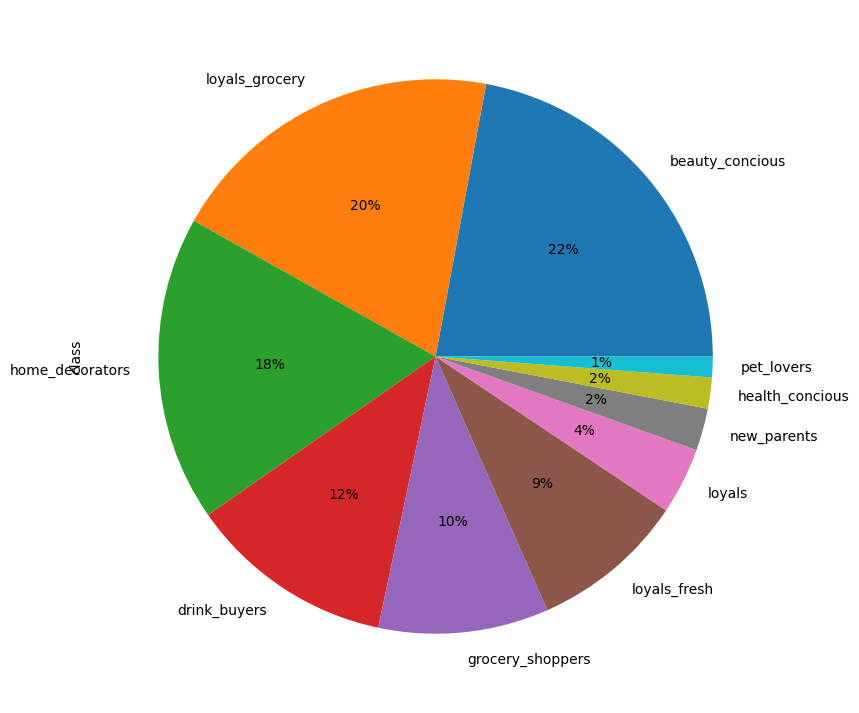

In [75]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()

* Our hypothesised loyal costomers are placed at the top when it comes to number of orders.
* Our next hypothesis of drink buyers being potential customers is also subtantiated.
* Pet lovers are very less in number, ulabox should buy less pet products accordingly.
* When seeing the large discount enjoyed by grocery shoppers in the previous data frame and the less number of grocery shoppers here. They are supposedly customers who brought only on the discount sale.
* ulabox can actually frame their buying strategies according to these numbers.

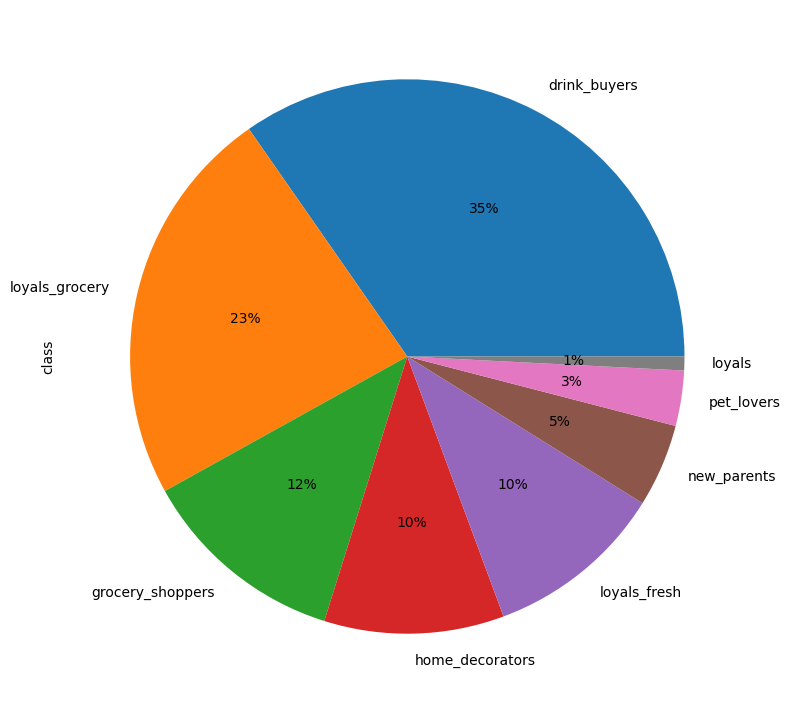

In [76]:
plt.figure(figsize=(9,9))
frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).index)
plt.show()

In [77]:
frame[(frame['discount%']<0).multiply(frame['class']!='drink_buyers')].describe()

Unnamed: 0      customer         order  total_items  discount%  \
count     81.000000     81.000000     81.000000    81.000000  81.000000   
mean   15625.950617   5214.469136  15625.950617    31.320988  -4.152099   
std     9280.915095   3112.784642   9280.915095    20.371443   4.709740   
min     1105.000000    296.000000   1105.000000     6.000000 -23.980000   
25%     6657.000000   2256.000000   6657.000000    16.000000  -5.770000   
50%    15827.000000   5289.000000  15827.000000    26.000000  -2.520000   
75%    24272.000000   8011.000000  24272.000000    40.000000  -0.910000   
max    29734.000000  10113.000000  29734.000000    86.000000  -0.030000   

         weekday       hour      Food%     Fresh%    Drinks%      Home%  \
count  81.000000  81.000000  81.000000  81.000000  81.000000  81.000000   
mean    3.530864  13.654321  25.182840   0.395185  30.732716  19.597160   
std     2.115930   6.504153  21.628512   3.556667  14.179246  18.381239   
min     1.000000   0.000000   0.000000   0.000000   4.470000   0.000000   
25%     2.000000  10.000000   3.840000   0.000000  17.600000   1.000000   
50%     3.000000  14.000000  24.250000   0.000000  29.540000  17.420000   
75%     5.000000  19.000000  37.460000   0.000000  40.890000  31.080000   
max     7.000000  23.000000  78.570000  32.010000  63.690000  74.670000   

         Beauty%    Health%      Baby%      Pets%     labels  
count  81.000000  81.000000  81.000000  81.000000  81.000000  
mean    3.425926   2.552840  15.455185   2.658272   4.703704  
std     6.621533   8.096041  28.721343  10.098877   2.628899  
min     0.000000   0.000000   0.000000   0.000000   2.000000  
25%     0.000000   0.000000   0.000000   0.000000   2.000000  
50%     0.000000   0.000000   0.000000   0.000000   4.000000  
75%     3.980000   0.000000  17.920000   0.000000   6.000000  
max    37.820000  52.570000  86.330000  67.420000   9.000000

* From the table we can say, even the people in other clusters who had to pay a negative discount have brought a lot drinks.

In [78]:
frame[frame['discount%']<0].shape[0]

124

* Only 124 among 30k had to pay an extra charge, that's not a pain killer problem.